In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline ()
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams

rcParams['figure.figsize'] = (9, 6)

UsageError: unrecognized arguments: ()


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
columns_list = ["full_sq", "life_sq", "floor", "max_floor", "material", "build_year", "num_room", 
                      "kitch_sq", "state", "area_m", "raion_popul", "green_zone_part", "indust_part", 
                      "preschool_education_centers_raion", "school_education_centers_raion", "hospital_beds_raion", 
                      "healthcare_centers_raion", "sport_objects_raion", "additional_education_raion", 
                      "shopping_centers_raion", "office_raion", "ID_metro", "metro_min_walk", "kindergarten_km", 
                      "school_km", "park_km", "green_zone_km", "industrial_km", "water_km", "mkad_km", "ttk_km", 
                      "sadovoe_km", "bulvar_ring_km", "kremlin_km", "ts_km", "big_market_km","market_shop_km", 
                      "fitness_km", "university_km", "workplaces_km", "shopping_centers_km", "office_km", 
                      "additional_education_raion", "preschool_km", "price_doc"]

In [5]:
data = pd.read_csv('C:/Netology/Machine_Learning/Lecture_9/data/train.csv', usecols = columns_list)

In [6]:
data.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.407578e+06,...,4.308127,10.814172,1.676258,0.485841,6.715026,0.884350,0.648488,0.637189,0.177975,5850000
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,9.589337e+06,...,0.725560,6.910568,3.424716,0.668364,1.852560,0.686252,0.519311,0.688796,0.273345,6000000
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.808270e+06,...,3.562188,5.752368,1.375443,0.733101,0.841254,1.510089,1.486533,1.543049,0.158072,5700000
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.258354e+07,...,0.583025,27.892717,0.811275,0.623484,10.903161,0.622272,0.599914,0.934273,0.236455,13100000
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.398461e+06,...,2.609420,9.155057,1.969738,0.220288,0.991683,0.892668,0.429052,0.077901,0.376838,16331452


In [7]:
print(pd.set_option("display.max_rows", 999))

print("Basic description of our data ", data.describe())

None
Basic description of our data              full_sq       life_sq         floor     max_floor      material  \
count  30471.000000  24088.000000  30304.000000  20899.000000  20899.000000   
mean      54.214269     34.403271      7.670803     12.558974      1.827121   
std       38.031487     52.285733      5.319989      6.756550      1.481154   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%       38.000000     20.000000      3.000000      9.000000      1.000000   
50%       49.000000     30.000000      6.500000     12.000000      1.000000   
75%       63.000000     43.000000     11.000000     17.000000      2.000000   
max     5326.000000   7478.000000     77.000000    117.000000      6.000000   

         build_year      num_room      kitch_sq         state        area_m  \
count  1.686600e+04  20899.000000  20899.000000  16912.000000  3.047100e+04   
mean   3.068057e+03      1.909804      6.399301      2.107025  1.765705e+07   
std    1.543878

In [8]:
# проверим типы данных

for col, type_col in zip(data.columns, data.dtypes):
    print(f'Столбец {col} тип данных {type_col}')

Столбец full_sq тип данных int64
Столбец life_sq тип данных float64
Столбец floor тип данных float64
Столбец max_floor тип данных float64
Столбец material тип данных float64
Столбец build_year тип данных float64
Столбец num_room тип данных float64
Столбец kitch_sq тип данных float64
Столбец state тип данных float64
Столбец area_m тип данных float64
Столбец raion_popul тип данных int64
Столбец green_zone_part тип данных float64
Столбец indust_part тип данных float64
Столбец preschool_education_centers_raion тип данных int64
Столбец school_education_centers_raion тип данных int64
Столбец hospital_beds_raion тип данных float64
Столбец healthcare_centers_raion тип данных int64
Столбец sport_objects_raion тип данных int64
Столбец additional_education_raion тип данных int64
Столбец shopping_centers_raion тип данных int64
Столбец office_raion тип данных int64
Столбец ID_metro тип данных int64
Столбец metro_min_walk тип данных float64
Столбец kindergarten_km тип данных float64
Столбец school_k

# Анализ по EDA

## Анализ недостающих значений

In [9]:
# Проверим количество строк в столбцах

for col, i in zip(data.columns, data.count()):
    print(f'Столбец {col} количество строк {i}')

Столбец full_sq количество строк 30471
Столбец life_sq количество строк 24088
Столбец floor количество строк 30304
Столбец max_floor количество строк 20899
Столбец material количество строк 20899
Столбец build_year количество строк 16866
Столбец num_room количество строк 20899
Столбец kitch_sq количество строк 20899
Столбец state количество строк 16912
Столбец area_m количество строк 30471
Столбец raion_popul количество строк 30471
Столбец green_zone_part количество строк 30471
Столбец indust_part количество строк 30471
Столбец preschool_education_centers_raion количество строк 30471
Столбец school_education_centers_raion количество строк 30471
Столбец hospital_beds_raion количество строк 16030
Столбец healthcare_centers_raion количество строк 30471
Столбец sport_objects_raion количество строк 30471
Столбец additional_education_raion количество строк 30471
Столбец shopping_centers_raion количество строк 30471
Столбец office_raion количество строк 30471
Столбец ID_metro количество строк

In [10]:
# процент пропусков в столбцах, где есть пропуски

i = 0

print('===========================================================')
print('Пропуски в данных:')
for column, item in zip(data.columns, (data.isna().mean() * 100).round(2)):
    if item != 0:
        print(f'Название столбца: {column}, наличие пропусков {item} %')
        i += 1
print('===========================================================')
print(f'Количество стобцов с пропусками {i}')

Пропуски в данных:
Название столбца: life_sq, наличие пропусков 20.95 %
Название столбца: floor, наличие пропусков 0.55 %
Название столбца: max_floor, наличие пропусков 31.41 %
Название столбца: material, наличие пропусков 31.41 %
Название столбца: build_year, наличие пропусков 44.65 %
Название столбца: num_room, наличие пропусков 31.41 %
Название столбца: kitch_sq, наличие пропусков 31.41 %
Название столбца: state, наличие пропусков 44.5 %
Название столбца: hospital_beds_raion, наличие пропусков 47.39 %
Название столбца: metro_min_walk, наличие пропусков 0.08 %
Количество стобцов с пропусками 10


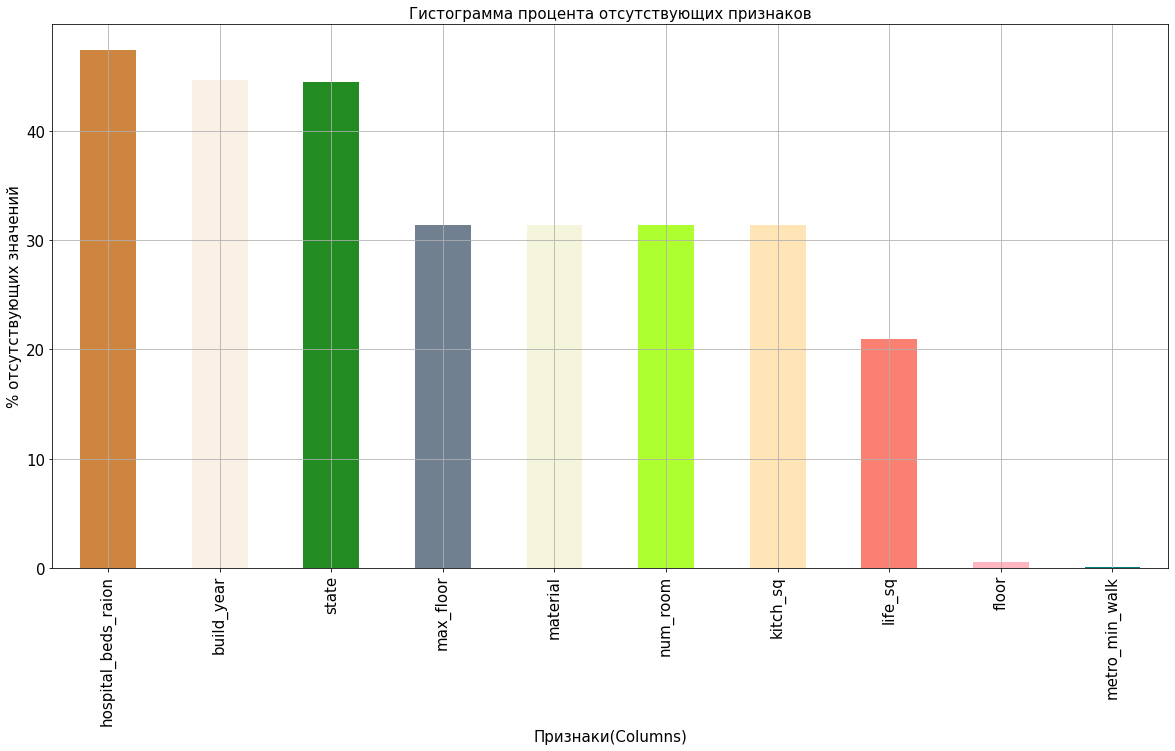

In [11]:
# Построtv все недостающие значения в порядке убывания

missing_values = ((data.isna().sum())/data.shape[0])*100

missing_values.sort_values(ascending=False,inplace = True)

missing_values = missing_values.drop(missing_values[missing_values == 0].index)

colour = ['peru','linen','forestgreen','slategray','beige','greenyellow','moccasin','salmon','lightpink','teal',
          'mintcream','chocolate','lime','powderblue','tan','azure','plum','crimson','palegreen','lightseagreen','olive']

plt.figure(figsize=(20,10))
missing_values.plot.bar(color = colour, fontsize=15)
plt.xlabel('Признаки(Columns)', fontsize=15)
plt.ylabel('% отсутствующих значений', fontsize=15)
plt.title('Гистограмма процента отсутствующих признаков', fontsize=15)
plt.grid()
plt.show()

Мы видим, что 10 столбцов имеют пропущенные значения, мы можем либо отбросить все столбцы с пропущенными значениями, либо установить порог, определяющий, какой процент пропущенных значений мы считаем, чтобы отбросить столбец.

## Одномерный анализ целевой переменной (price_doc)

In [12]:
data['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

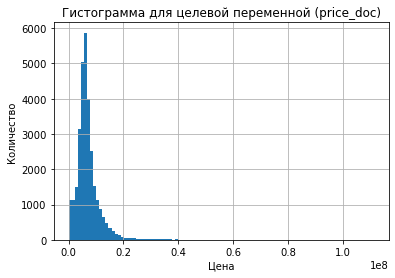

In [13]:
plt.hist(data['price_doc'],bins=100)
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Гистограмма для целевой переменной (price_doc)')
plt.grid()
plt.show();

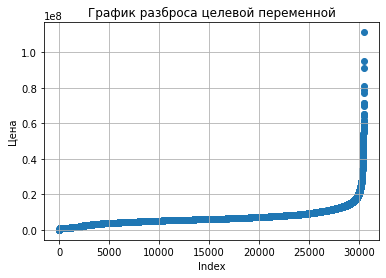

In [14]:
#Scatter plot Analysis

plt.scatter(range(data.shape[0]),np.sort(data['price_doc'].values))
plt.xlabel('Index')
plt.ylabel('Цена')
plt.title('График разброса целевой переменной')
plt.grid()
plt.show()

In [15]:
# Подробная информация о максимальной цене

data[data.price_doc == data.price_doc.max()]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
2118,55,31.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,8392316.21,...,4.184125,4.043604,4.238845,0.989694,1.65519,2.757239,0.496593,1.239758,0.432346,111111112


In [16]:
# Подробная информация о минимальной цене
data[data.price_doc==data.price_doc.min()]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
20244,72,37.0,11.0,16.0,1.0,2006.0,2.0,12.0,1.0,14286990.83,...,9.552233,13.181625,2.411174,1.054814,3.811381,1.714588,1.307396,1.695963,0.889795,100000


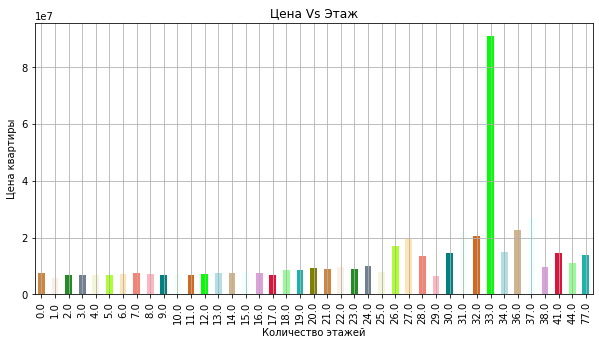

In [17]:
plt.figure(figsize=(10,5))
data.price_doc.groupby(data.floor).mean().plot.bar(color = colour)

plt.xlabel('Количество этажей')
plt.ylabel('Цена квартиры')
plt.title('Цена Vs Этаж')
plt.grid()
plt.show();

Из этого графика можно сделать вывод, что средняя цена для большинства квартир одинакова,  квартиры на 33 этаже имеют наивысшую среднюю цену, но могут отличаться. Нет зависимости между продажной ценой и этажностью в квартире.

### Как общая площадь и жилая площадь влияют на цену продажи

Перед удалением выбросов


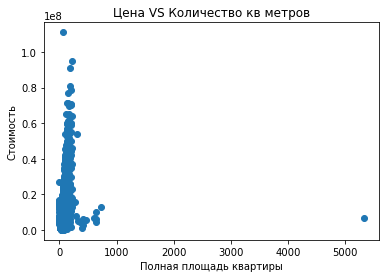

In [18]:
print("Перед удалением выбросов")

plt.scatter(data.full_sq, data.price_doc)
plt.xlabel('Полная площадь квартиры')
plt.ylabel('Стоимость')
plt.title('Цена VS Количество кв метров')
plt.show();

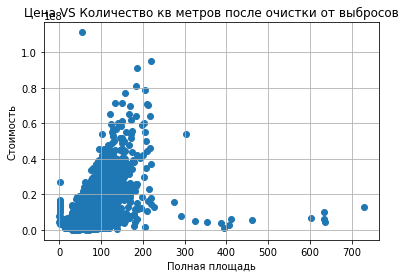

In [19]:
# Удаление выбросов, чтобы мы могли видеть четкую картину
data = data[data.full_sq<1000]

plt.scatter(data.full_sq,data.price_doc)
plt.xlabel('Полная площадь')
plt.ylabel('Стоимость')
plt.title('Цена VS Количество кв метров после очистки от выбросов')
plt.grid()
plt.show()

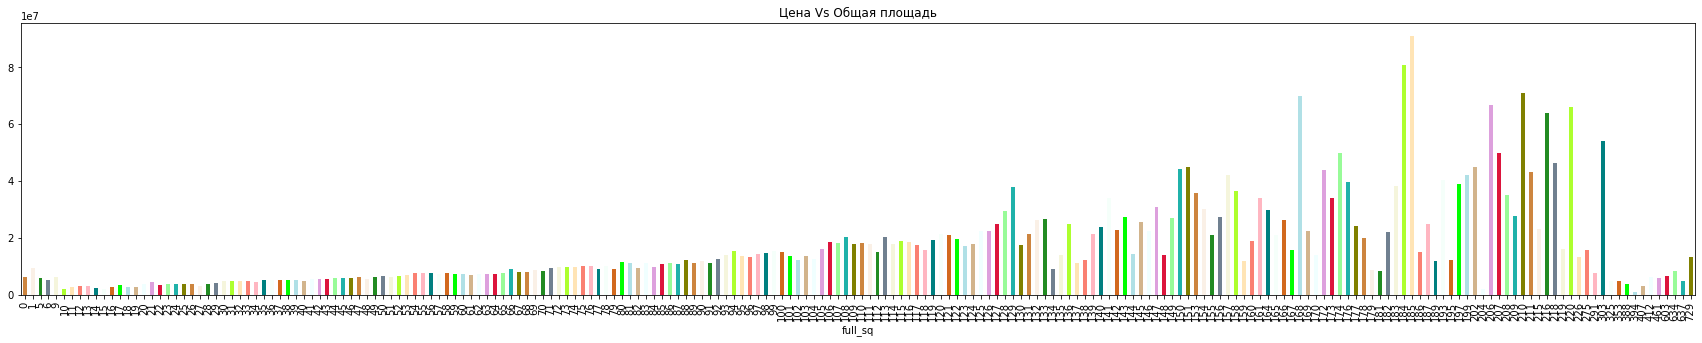

In [20]:
plt.figure(figsize=(30,5))
data.price_doc.groupby(data.full_sq).mean().plot.bar(color = colour)
plt.title('Цена Vs Общая площадь')
plt.show();

Хотя плавного рисунка нет, но грубо можно сказать, что с увеличением площади растет и цена.

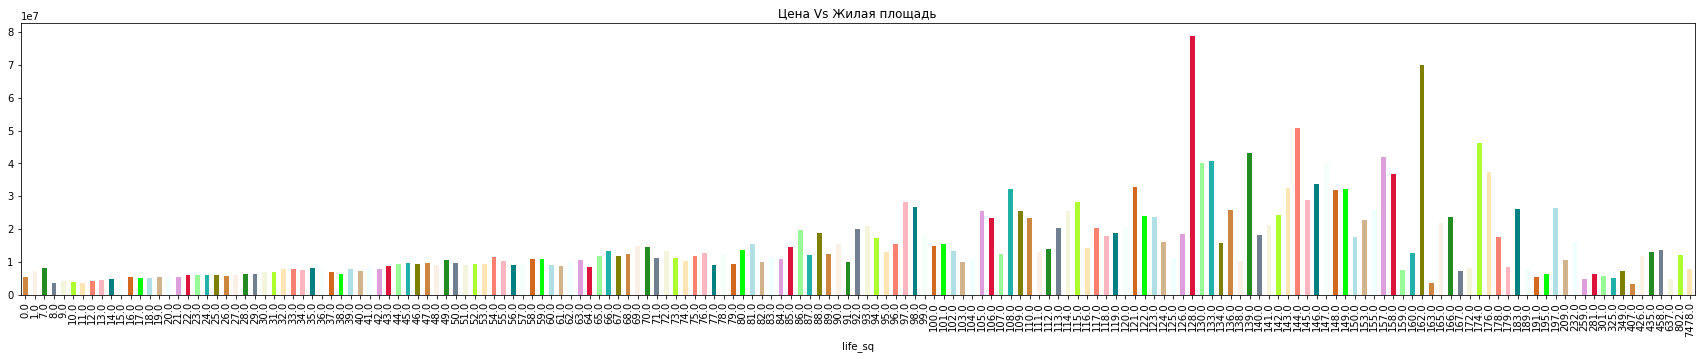

In [21]:
plt.figure(figsize=(30,5))
data.price_doc.groupby(data.life_sq).mean().plot.bar(color = colour)
plt.title('Цена Vs Жилая площадь')
plt.show();

И гистограмма общей площади, и жилая площадь почти одинаковы, поэтому мы можем грубо сказать, что с увеличением площади цена также увеличивается.

### Для каждого района определим самое старое здание (только год). Разделим год постройки на два набора до 2000 года и после 2000 года. Затем определите, как продаются цены между этими двумя наборами.

In [22]:
# год постройки необходимо очистить и предварительно обработать перед использованием

bld_yr_replace = {20052009:2005, 0:np.nan, 1:np.nan, 2:np.nan, 3:np.nan, 20:2000, 215:2015, 4965:1965, 71:1971}
data['build_year'].replace(to_replace = bld_yr_replace, inplace = True)
data['build_year'].tail()

30466    1975.0
30467    1935.0
30468       NaN
30469    2003.0
30470    1968.0
Name: build_year, dtype: float64

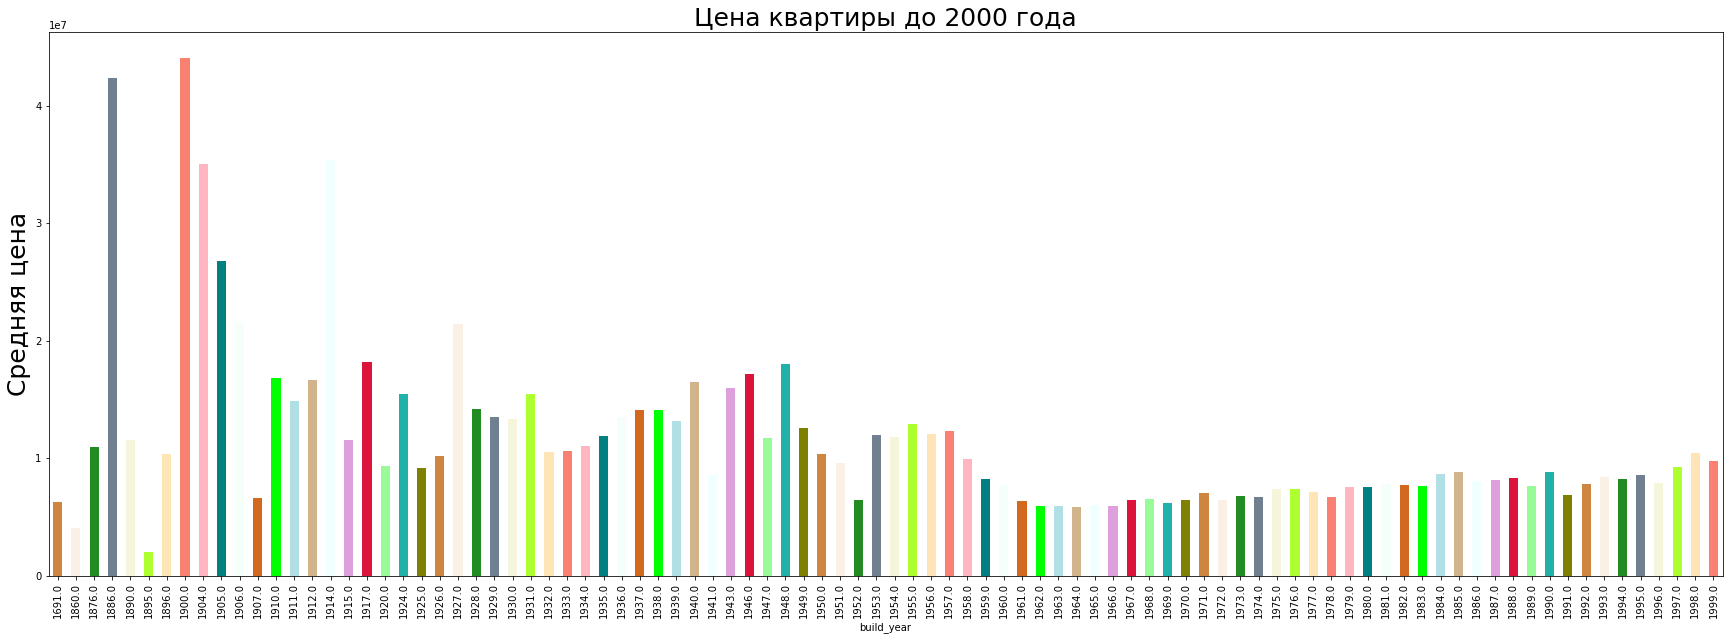

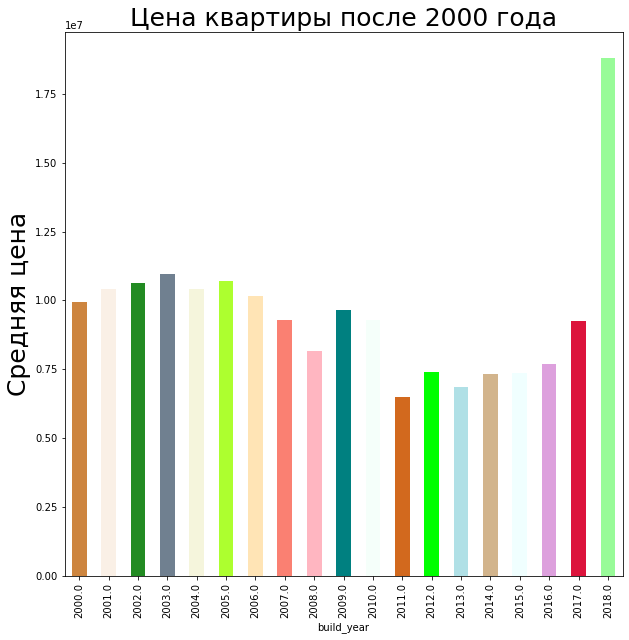

In [23]:
data_before_2000 = data[data.build_year<2000]
data_after_2000 = data[data.build_year>=2000]

plt.figure(figsize=(30,10))

data_before_2000.price_doc.groupby(data_before_2000.build_year).mean().plot.bar(color = colour)
plt.ylabel('Средняя цена', fontsize = 25)
plt.title('Цена квартиры до 2000 года', fontsize = 25)

plt.show()

plt.figure(figsize=(10,10))
data_after_2000.price_doc.groupby(data_after_2000.build_year).mean().plot.bar(color = colour)
plt.ylabel('Средняя цена', fontsize = 25)
plt.title('Цена квартиры после 2000 года', fontsize = 25)

plt.show()

На основе этих двух столбчатых диаграмм мы можем сказать, что если дом старый, то цена на квартиру может быть выше по сравнению с новостройкой.
Все дома, построенные до 2000 года, имеют более высокую цену по сравнению с домами, построенными после 2000 года.
Если дом до 1950-х или 1960-х годов намного дороже

### Как доля зеленых насаждений в общей площади местности влияет на цену продажи?

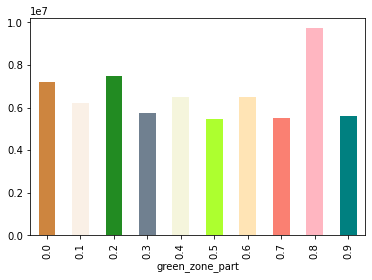

In [24]:
# Давайте подготовим данные для green_zone_part, сначала мы возьмем округленное число, затем сгруппируем данные и построим гистограмму.
df = data.copy()
df['green_zone_part'] = df.green_zone_part.round(1)

#plt.figure(figsize=(10,10))
df.price_doc.groupby(df.green_zone_part).median().plot.bar(color = colour)
plt.show();

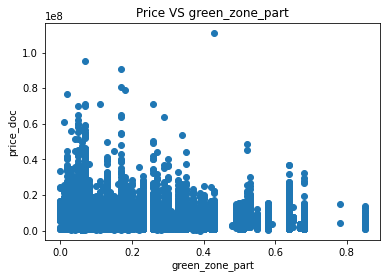

In [25]:
df = data.copy()
df['green_zone_part'] = df.green_zone_part.round(2)

plt.scatter(df.green_zone_part,df.price_doc)
plt.xlabel('green_zone_part')
plt.ylabel('price_doc')
plt.title('Price VS green_zone_part')
plt.show()

Можно сказать, что по мере удаления дома от зеленой зоны наша цена снижается.

### Как доля промышленных зон в общей площади влияет на цену продажи

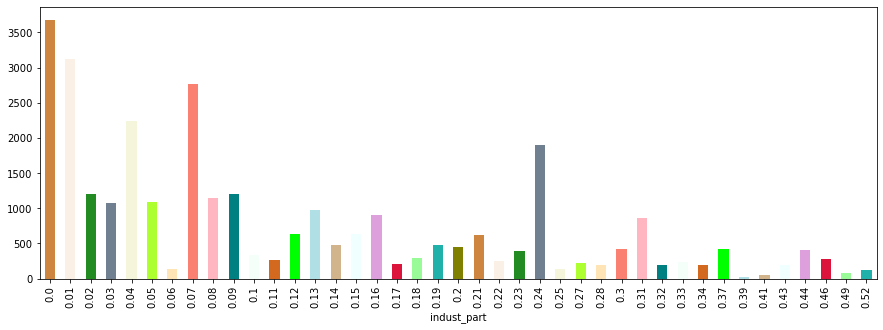

In [26]:
df = data.copy()
df['indust_part'] = df.indust_part.round(2)

plt.figure(figsize=(15,5))
df.price_doc.groupby(df.indust_part).count().plot.bar(color = colour)
plt.show();

Если доля промышленной зоны меньше, тем больше вероятность, что люди купят дом в этом районе, или, другими словами, мы можем сказать, что количество домов больше там, где меньше доля промышленной зоны.

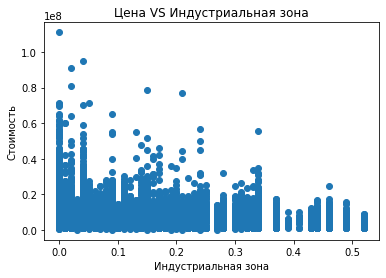

In [27]:
plt.scatter(df.indust_part,df.price_doc)
plt.xlabel('Индустриальная зона')
plt.ylabel('Стоимость')
plt.title('Цена VS Индустриальная зона')
plt.show();

Цена продажи квартир
высока, если в этом районе меньше промышленной зоны.

### Каким образом увеличение числа школ в непосредственной близости от здания влияет на стоимость зданий? То же самое касается торговых центров.

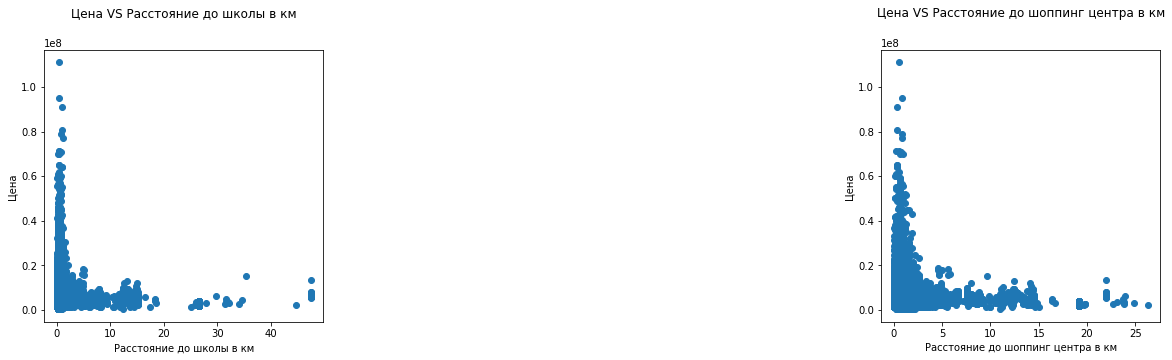

In [28]:
plt.figure(figsize=(20,5))

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,3,1)
plt.scatter(data.school_km, data.price_doc)
plt.xlabel('Расстояние до школы в км')
plt.ylabel('Цена')
plt.title('Цена VS Расстояние до школы в км',x=0.5,y=1.1)

plt.subplot(1,3,3)
plt.scatter(data.shopping_centers_km, data.price_doc)
plt.xlabel('Расстояние до шоппинг центра в км')
plt.ylabel('Цена')
plt.title('Цена VS Расстояние до шоппинг центра в км',x=0.5,y=1.1)

plt.show();

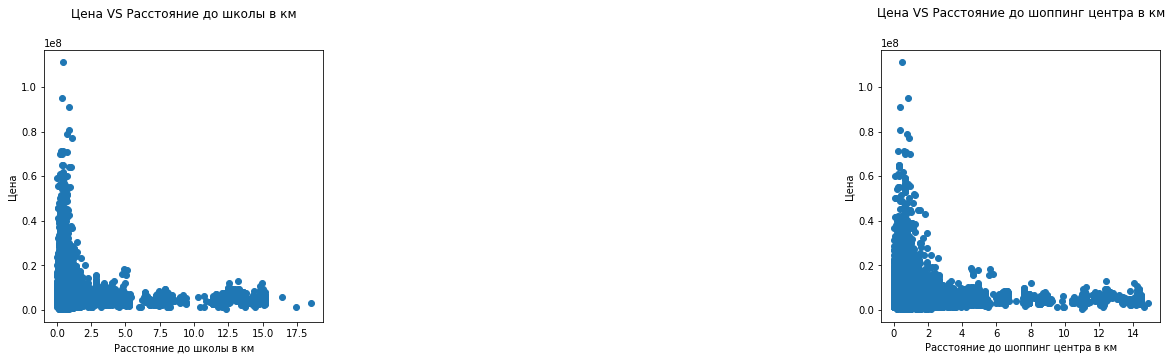

In [29]:
# Удаление выбросов

data = data[data.school_km<20]
data = data[data.shopping_centers_km<15]


plt.figure(figsize=(20,5))

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,3,1)
plt.scatter(data.school_km,data.price_doc)
plt.xlabel('Расстояние до школы в км')
plt.ylabel('Цена')
plt.title('Цена VS Расстояние до школы в км',x=0.5,y=1.1)


plt.subplot(1,3,3)
plt.scatter(data.shopping_centers_km,data.price_doc)
plt.xlabel('Расстояние до шоппинг центра в км')
plt.ylabel('Цена')
plt.title('Цена VS Расстояние до шоппинг центра в км',x=0.5,y=1.1)


plt.show();

На всех трех графиках мы видим, что цена дома прямо пропорциональна расстоянию.

### Теперь проверим, имеет ли фитнес-клуб какое-либо отношение к продажной цене дома.

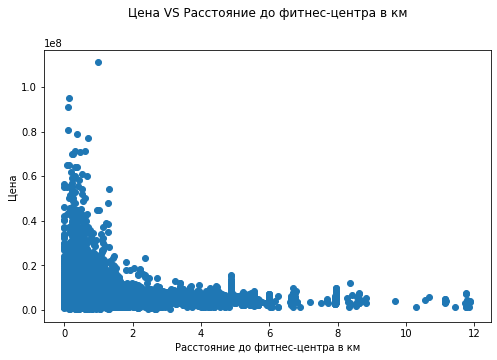

In [30]:
plt.figure(figsize=(20,5))

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plt.scatter(data.fitness_km,data.price_doc)
plt.xlabel('Расстояние до фитнес-центра в км')
plt.ylabel('Цена')
plt.title('Цена VS Расстояние до фитнес-центра в км',x=0.5,y=1.1)
plt.show();

Если дом находится ближе к фитнес-клубу, цена будет выше.

### Посмотрим, повлияет ли количество населения в этом районе на продажную цену квартиры или нет?

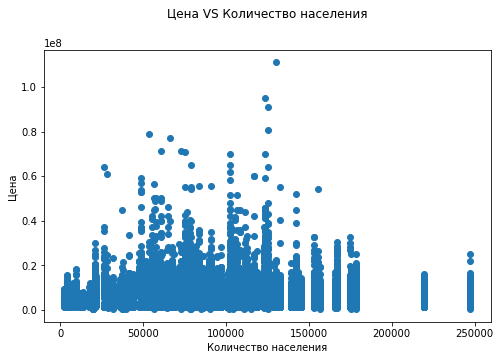

In [31]:
plt.figure(figsize=(20,5))

plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
plt.scatter(data.raion_popul,data.price_doc)
plt.xlabel('Количество населения')
plt.ylabel('Цена')
plt.title('Цена VS Количество населения', x=0.5, y=1.1)
plt.show();

Цена продажи квартир низкая, если район слишком густонаселенный или слишком малозаселенный.

### Цена квартиры также зависит от района

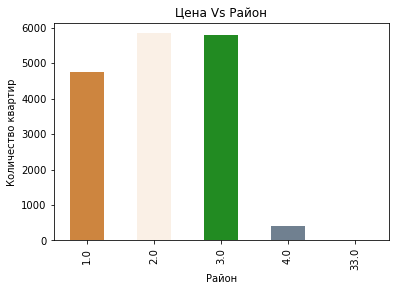

In [32]:
data.price_doc.groupby(data.state).count().plot.bar(color=colour)
plt.title('Цена Vs Район')
plt.ylabel('Количество квартир')
plt.xlabel('Район')
plt.show();

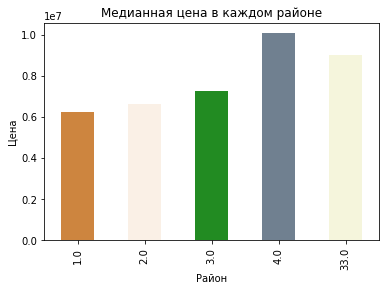

In [33]:
data.price_doc.groupby(data.state).median().plot.bar(color=colour)
plt.ylabel('Цена')
plt.title('Медианная цена в каждом районе')
plt.xlabel('Район')
plt.show();

Из этих двух столбчатых диаграмм мы можем сделать вывод, что количество квартир в районах 1,2 и 3 больше, а средняя цена дома самая высокая в штатах 4 и 33. Следовательно, люди покупают больше домов в районах 1,2 и 3 потому что дома в этих районах дешевле, чем в районах 4 и 33.

## Изучим корреляцию признаков

(30277, 44)


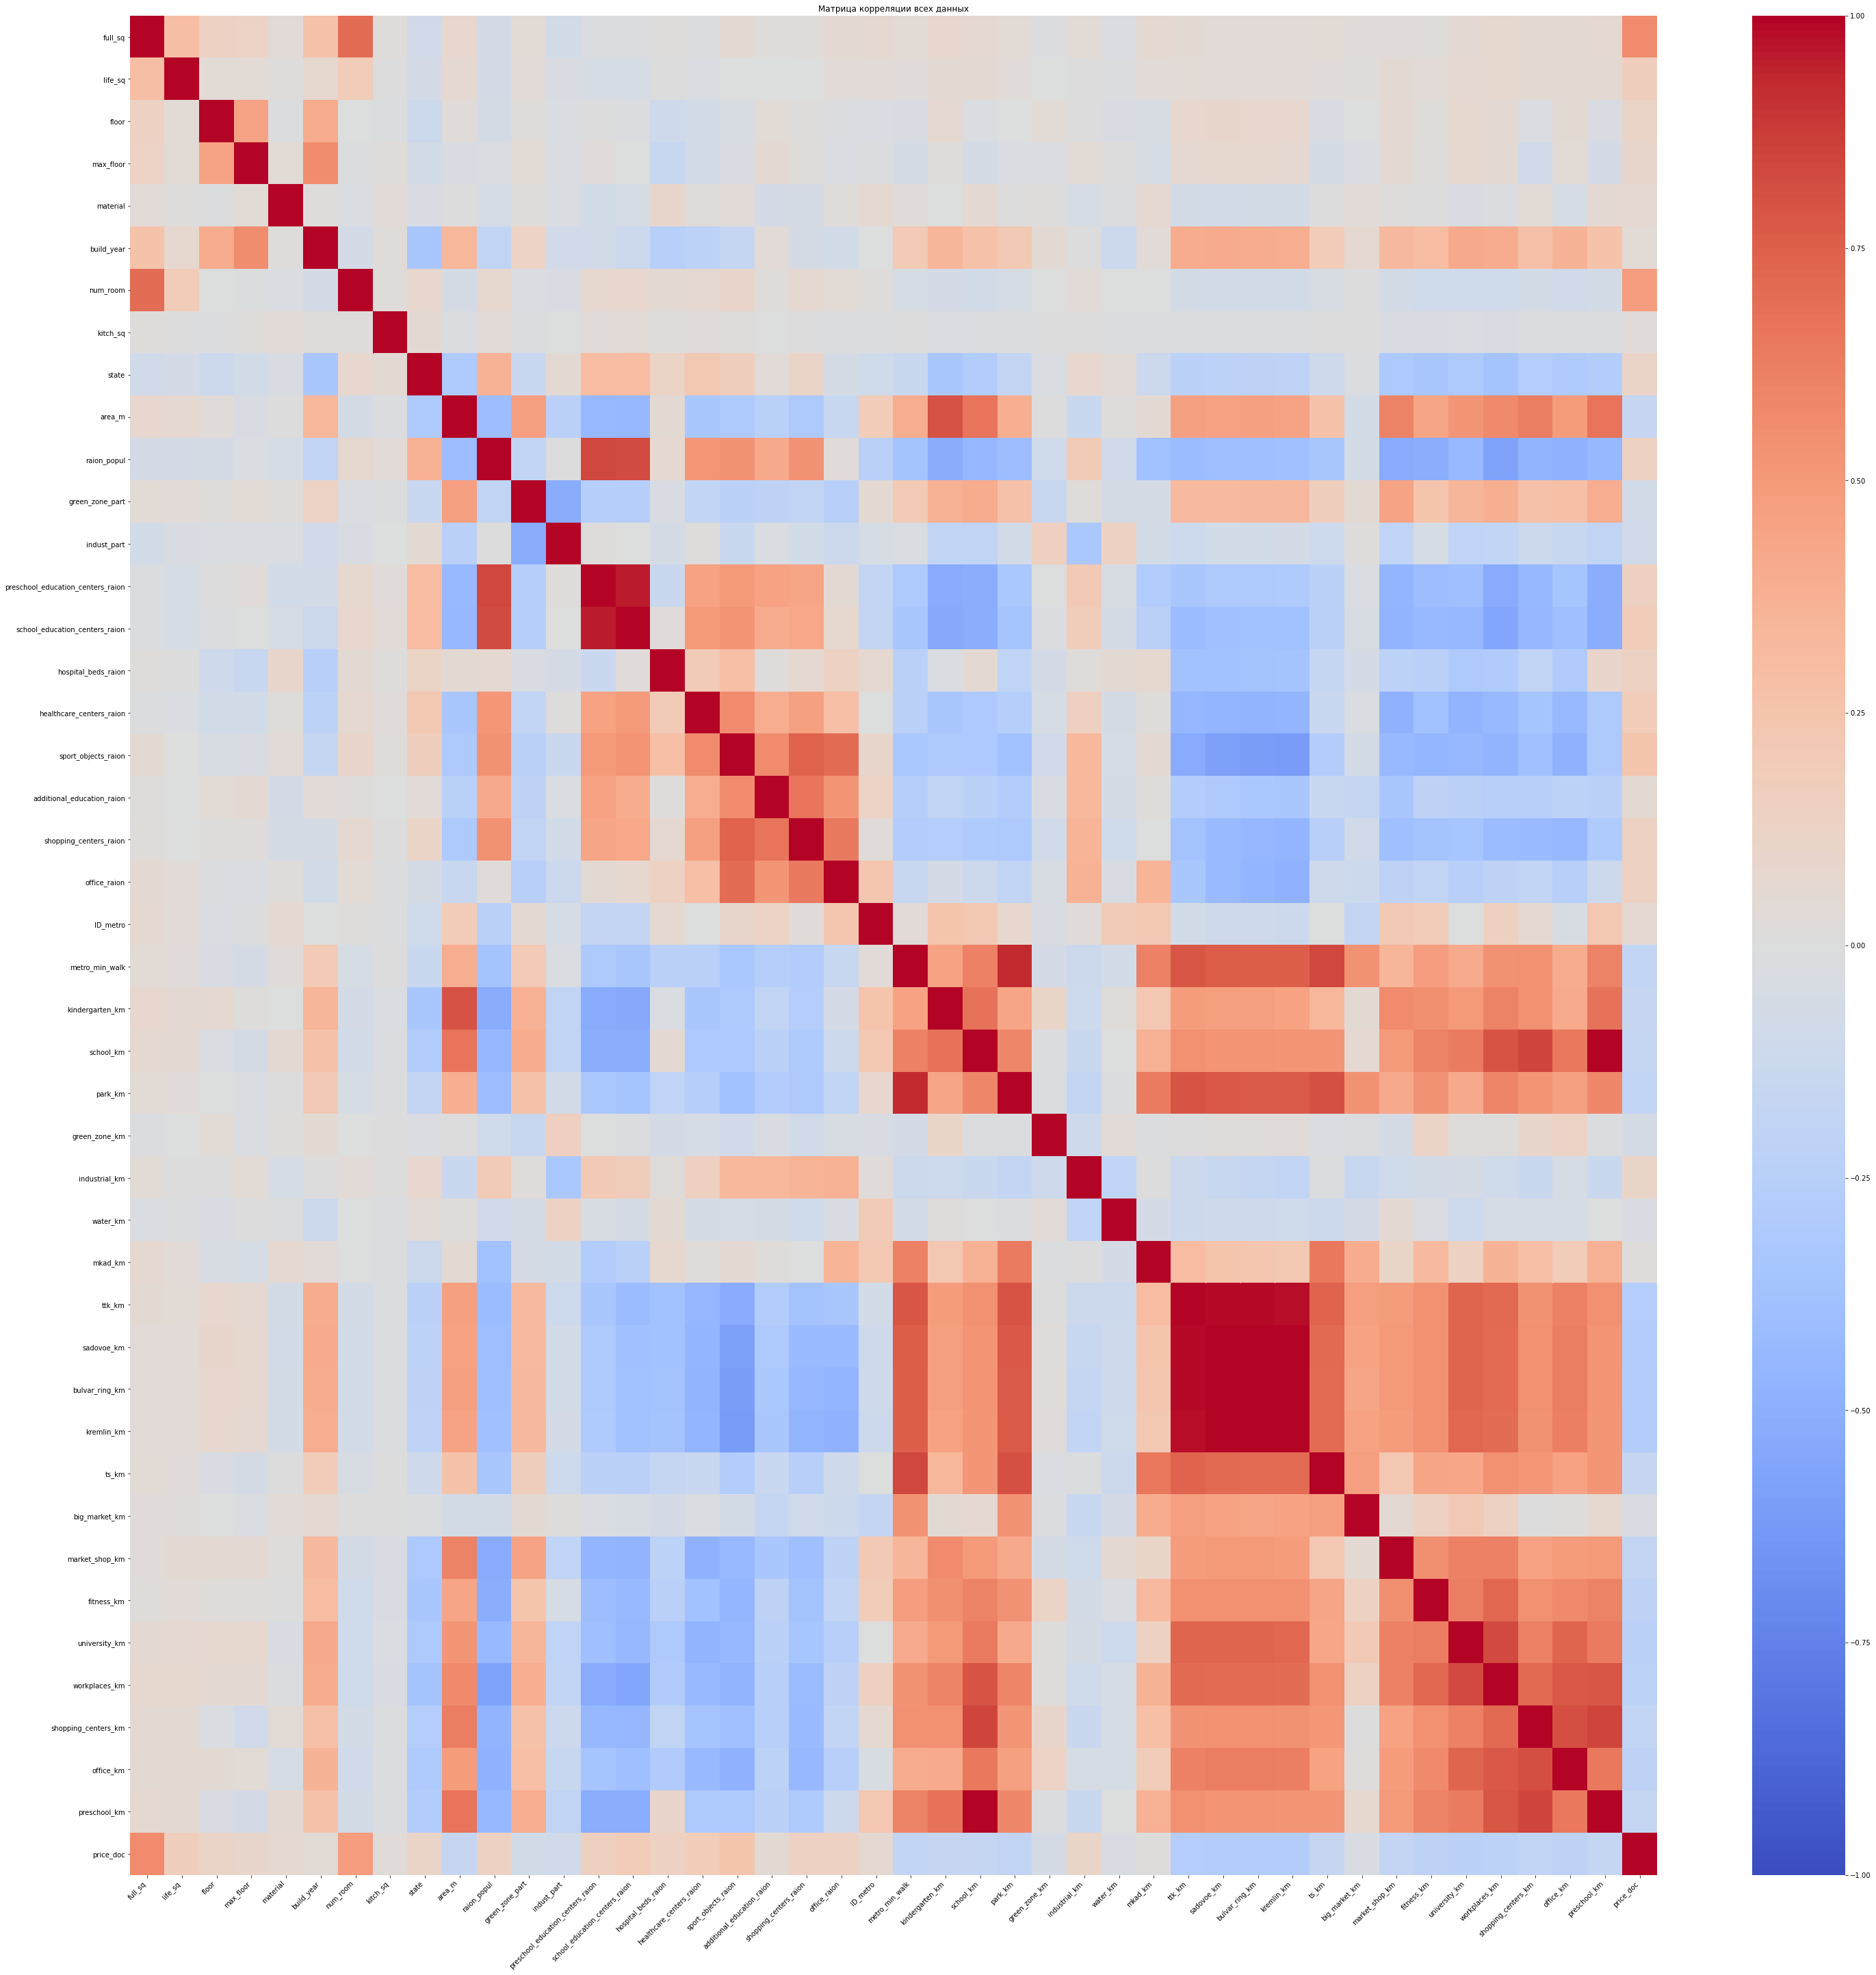

In [34]:
print(data.shape)

corr = data.corr()
plt.figure(figsize=(50, 50))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap= 'coolwarm'
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Матрица корреляции всех данных')
plt.show()

In [35]:
# Некоторые важные функции (Хельге Бьорланд и Стиан Эйде)
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = False, 
        annot_kws = { 'fontsize' : 12 },
        xticklabels=False, 
        yticklabels=False
    )
    plt.show()

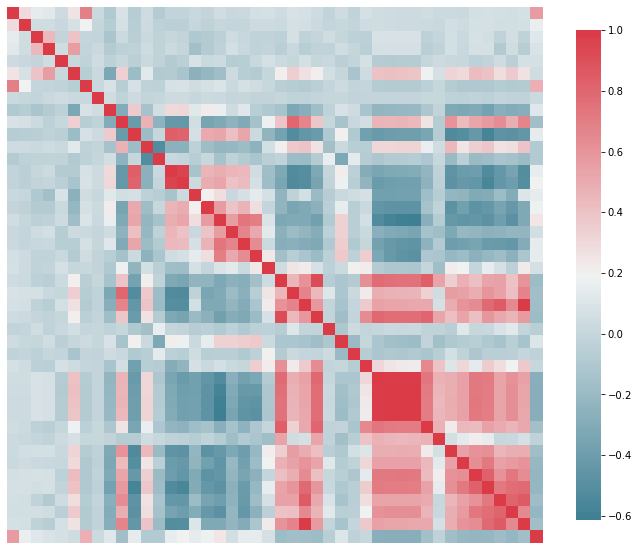

In [36]:
plot_correlation_map(data)

Наши особенности страдают мультиколлинеарностью. Нам нужно это учитывать при выполнении регрессии.

### Мы не можем визуализировать данные за один раз, мы разделим наши данные на основе значения корреляции по отношению к цене.

In [37]:
# Корреляция с целевой переменной
cor_target = abs(corr["price_doc"])

# Выбор сильно коррелированных функций
relevant_features = cor_target[cor_target>=0.25]
relevant_features

full_sq           0.568860
num_room          0.478754
ttk_km            0.273011
sadovoe_km        0.284137
bulvar_ring_km    0.279045
kremlin_km        0.279128
price_doc         1.000000
Name: price_doc, dtype: float64

### Это признаки, которые сильно коррелированы с целевой переменной, мы можем только сохранить эти признаки и отбросить их все, мы также проверим, коррелированы ли эти признаки друг с другом, в этом случае мы сохраним только один признак.

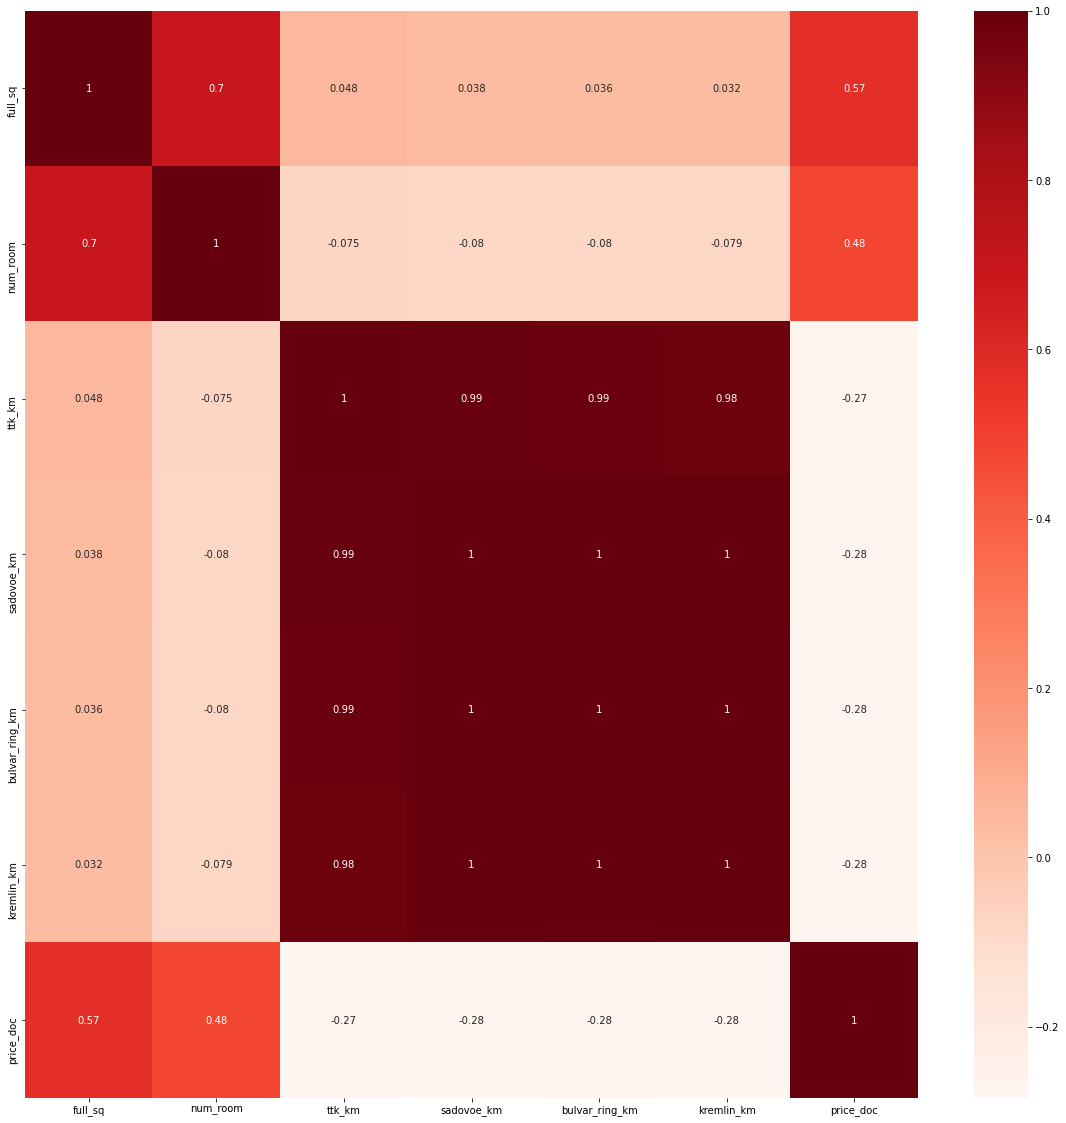

In [38]:
# Использыем корреляцию Пирсона

plt.figure(figsize=(20,20))
cor = data[relevant_features.index].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show();

Выводы:
    
'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km' эти признаки сильно коррелированы друг с другом, поэтому мы можем сохранить любой среди всех и отбросить остальные.

### Теперь давайте проанализируем cor_target на этом этапе между 0.25 и 0.20, то есть признаками, которые имеют значения корреляции между (0.20 - 0.25) по отношению к price_doc.

In [39]:
cor_target = abs(corr["price_doc"])

relevant_features = cor_target[(cor_target<0.25) & (cor_target>=0.20)]
relevant_features

sport_objects_raion    0.249284
fitness_km             0.211340
university_km          0.227963
workplaces_km          0.220867
office_km              0.217979
Name: price_doc, dtype: float64

In [40]:
print(len(relevant_features))

5


In [41]:
print(relevant_features.index)

Index(['sport_objects_raion', 'fitness_km', 'university_km', 'workplaces_km',
       'office_km'],
      dtype='object')


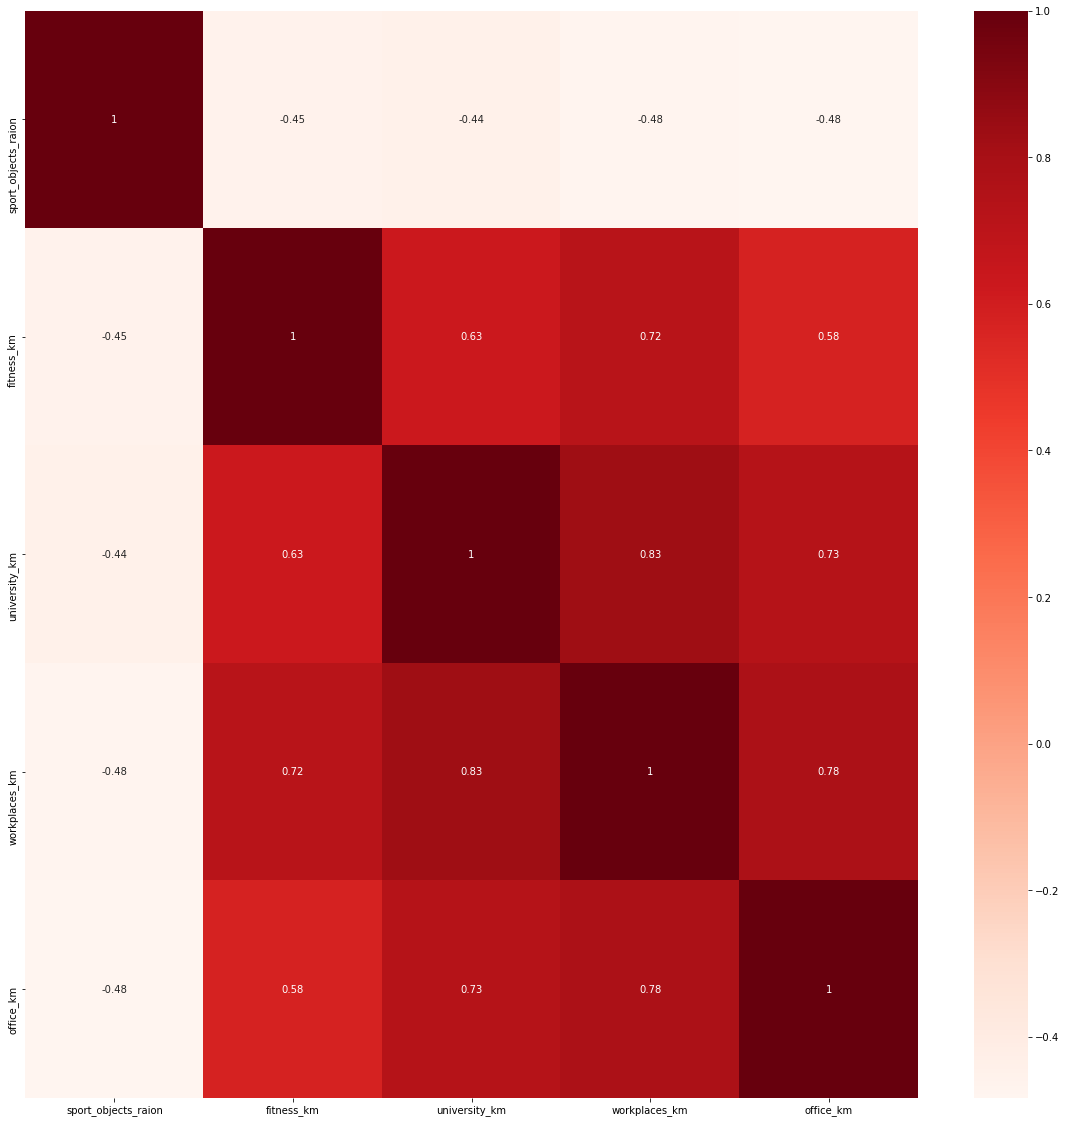

In [42]:
# Использыем корреляцию Пирсона

plt.figure(figsize=(20,20))
cor = data[relevant_features.index].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show();

'university_km', 'office_km', 'fitness_km', 'university_km', 'workplaces_km' эти признаки сильно коррелируют друг с другом, поэтому мы можем оставьте любой из них и отбросить остальные.

### Теперь давайте проанализируем cor_target на этом шаге в диапазоне от 0.20 до 0.15, т.е. функции, которые имеют значения корреляции между (0.15-0.20) по отношению к price_doc.

In [43]:
cor_target = abs(corr["price_doc"])

relevant_features = cor_target[(cor_target>=0.15) & (cor_target<0.20)]
relevant_features

life_sq                              0.166495
area_m                               0.160182
preschool_education_centers_raion    0.154092
school_education_centers_raion       0.188567
healthcare_centers_raion             0.186612
metro_min_walk                       0.185097
kindergarten_km                      0.159518
school_km                            0.167108
park_km                              0.188767
ts_km                                0.158433
market_shop_km                       0.175030
shopping_centers_km                  0.183343
preschool_km                         0.164363
Name: price_doc, dtype: float64

In [44]:
print(len(relevant_features))
print(relevant_features.index)

13
Index(['life_sq', 'area_m', 'preschool_education_centers_raion',
       'school_education_centers_raion', 'healthcare_centers_raion',
       'metro_min_walk', 'kindergarten_km', 'school_km', 'park_km', 'ts_km',
       'market_shop_km', 'shopping_centers_km', 'preschool_km'],
      dtype='object')


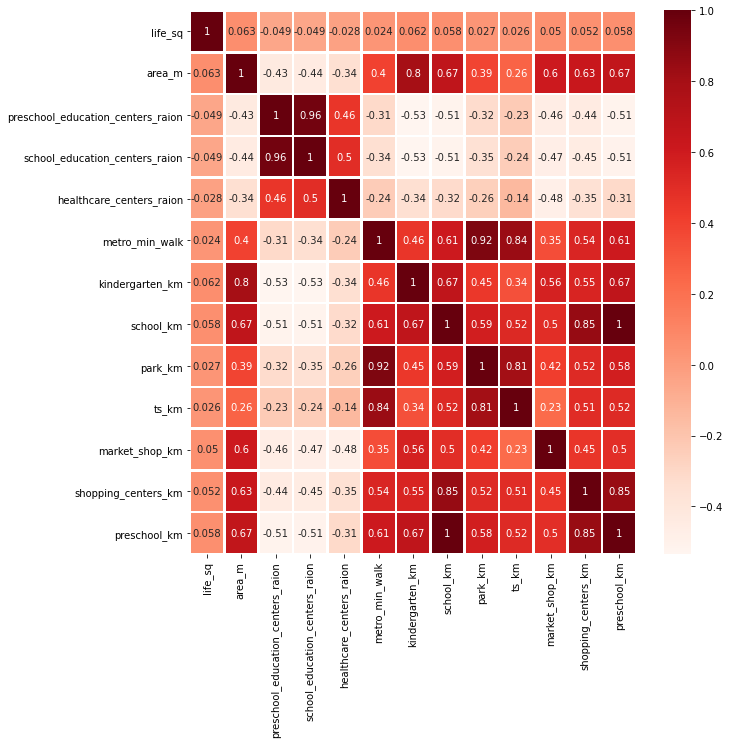

<Figure size 3600x3600 with 0 Axes>

In [45]:
# Используем корреляцию Пирсона
fig, ax = plt.subplots(figsize=(10,10))
plt.figure(figsize=(50,50))
cor = data[relevant_features.index].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, linewidths=1.5, ax = ax)
plt.show();

'preschool_education_centers_raion', 'school_education_centers_raion' эти признаки сильно коррелируют друг с другом, поэтому мы можем оставьте любой  и отбросить все остальное.

'metro_min_walk', 'park_km', 'ts_km' эти признаки сильно коррелируют друг с другом, поэтому мы можем оставьте любой  и отбросить все остальное.

'area_m', 'kindergarten_km' эти признаки сильно коррелируют друг с другом, поэтому мы можем оставьте любой  и отбросить все остальное.

'school_km', 'shopping_centers_km' эти признаки сильно коррелируют друг с другом, поэтому мы можем оставьте любой  и отбросить все остальное.

'preschool_km', 'shopping_centers_km' эти признаки сильно коррелируют друг с другом, поэтому мы можем оставьте любой  и отбросить все остальное.

### Теперь давайте проанализируем cor_target на этом этапе между 0.15 и 0.10, то есть функциями, которые имеют значения корреляции между (0.10-0.15) по отношению к price_doc.

In [46]:
cor_target = abs(corr["price_doc"])

relevant_features = cor_target[(cor_target>=0.10) & (cor_target<0.15)]
relevant_features

floor                     0.112992
state                     0.115338
raion_popul               0.146246
hospital_beds_raion       0.147204
shopping_centers_raion    0.147234
office_raion              0.144416
industrial_km             0.101820
Name: price_doc, dtype: float64

In [47]:
print(len(relevant_features))
print(relevant_features.index)

7
Index(['floor', 'state', 'raion_popul', 'hospital_beds_raion',
       'shopping_centers_raion', 'office_raion', 'industrial_km'],
      dtype='object')


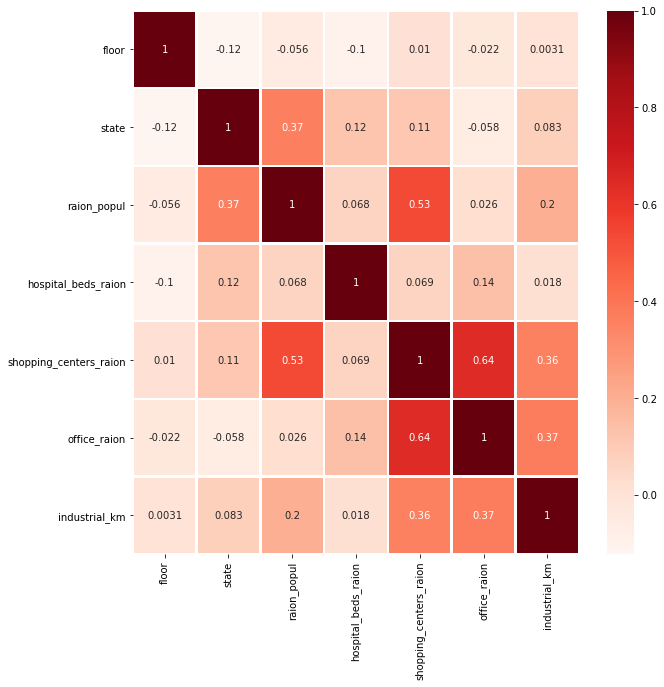

In [48]:
# Используем корреляцию Пирсона

fig, ax = plt.subplots(figsize=(10,10))
cor = data[relevant_features.index].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, linewidths=1.5, ax = ax)
plt.show()

'shopping_centers_raion', 'office_raion' эти признаки сильно коррелируют друг с другом, поэтому мы можем оставьте любой и отбросить все остальное.

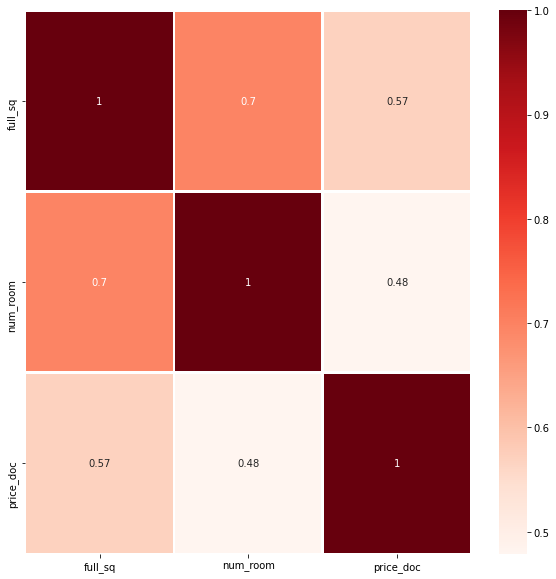

In [49]:
# Используем корреляцию Пирсона

fig, ax = plt.subplots(figsize=(10,10))
cor = data[['full_sq', 'num_room', 'price_doc']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, linewidths=1.5, ax = ax)
plt.show()

Поскольку столбцы full_sq и num_room сильно коррелируют между собой, оставим один из этих признаков

## Удалим признаки имеющие между собой высокую корреляцию

In [50]:
data.drop(columns=['num_room', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km', 
                   'university_km', 'office_km', 'fitness_km', 'university_km', 
                   'preschool_education_centers_raion', 'park_km', 'ts_km',  'kindergarten_km',  
                   'shopping_centers_km'],inplace=True)

In [51]:
data.head()

,full_sq,life_sq,floor,max_floor,material,build_year,kitch_sq,state,area_m,raion_popul,...,green_zone_km,industrial_km,water_km,mkad_km,ttk_km,big_market_km,market_shop_km,workplaces_km,preschool_km,price_doc
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,6.407578e+06,155572,...,0.600973,1.080934,0.992631,1.422391,10.918587,10.814172,1.676258,0.884350,0.177975,5850000
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,9.589337e+06,115352,...,0.065321,0.966479,0.698081,9.503405,3.103996,6.910568,3.424716,0.686252,0.273345,6000000
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,4.808270e+06,101708,...,0.453172,0.939275,0.468265,5.604800,2.927487,5.752368,1.375443,1.510089,0.158072,5700000
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,1.258354e+07,178473,...,0.106125,0.451173,1.200336,2.677824,14.606501,27.892717,0.811275,0.622272,0.236455,13100000
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,8.398461e+06,108171,...,0.236214,0.392871,0.820294,11.616653,1.721834,9.155057,1.969738,0.892668,0.376838,16331452


In [52]:
# процент пропусков в столбцах, где есть пропуски
list_col = []
i = 0

print('===========================================================')
print('Пропуски в данных:')
for column, item in zip(data.columns, (data.isna().mean() * 100).round(2)):
    if item != 0:
        print(f'Название столбца: {column}, наличие пропусков {item} %')
        list_col.append(str(column))
        i += 1
print('===========================================================')
print(f'Количество стобцов с пропусками {i}')

Пропуски в данных:
Название столбца: life_sq, наличие пропусков 20.75 %
Название столбца: floor, наличие пропусков 0.55 %
Название столбца: max_floor, наличие пропусков 31.59 %
Название столбца: material, наличие пропусков 31.59 %
Название столбца: build_year, наличие пропусков 47.47 %
Название столбца: kitch_sq, наличие пропусков 31.59 %
Название столбца: state, наличие пропусков 44.54 %
Название столбца: hospital_beds_raion, наличие пропусков 47.07 %
Название столбца: metro_min_walk, наличие пропусков 0.08 %
Количество стобцов с пропусками 9


In [53]:
for column in list_col:
    print(f'Столбец {column} тип данных {data[column].dtypes}')

Столбец life_sq тип данных float64
Столбец floor тип данных float64
Столбец max_floor тип данных float64
Столбец material тип данных float64
Столбец build_year тип данных float64
Столбец kitch_sq тип данных float64
Столбец state тип данных float64
Столбец hospital_beds_raion тип данных float64
Столбец metro_min_walk тип данных float64


## Удаление выбросов методом квартилей

In [54]:
print("0th quantile of price_doc : ", (np.quantile(data['price_doc'], 0))/100000)
print("2nd quantile of price_doc : ", (np.quantile(data['price_doc'], 0.02))/100000)
print("5th quantile of price_doc : ", np.quantile(data['price_doc'], .05)/100000) 
print("10th quantile of price_doc : ", np.quantile(data['price_doc'], .10)/100000)
print("15th quantile of price_doc : ", np.quantile(data['price_doc'], .15)/100000)
print("Q1 quantile of price_doc : ", np.quantile(data['price_doc'], .25)/100000)
print("Q2 quantile of price_doc : ", np.quantile(data['price_doc'], .50)/100000)
print("Q3 quantile of price_doc : ", np.quantile(data['price_doc'], .75)/100000)
print("90th quantile of price_doc : ", np.quantile(data['price_doc'], .90)/100000)
print("95th quantile of price_doc : ", np.quantile(data['price_doc'], .95)/100000)
print("99th quantile of price_doc : ", (np.quantile(data['price_doc'], 0.99))/100000)
print("100th quantile of price_doc : ", np.quantile(data['price_doc'], 1)/100000)

0th quantile of price_doc :  1.0
2nd quantile of price_doc :  10.0
5th quantile of price_doc :  20.0
10th quantile of price_doc :  30.59062
15th quantile of price_doc :  38.65945
Q1 quantile of price_doc :  47.68714
Q2 quantile of price_doc :  63.0
Q3 quantile of price_doc :  83.0
90th quantile of price_doc :  118.0
95th quantile of price_doc :  145.36079999999995
99th quantile of price_doc :  247.1439135999988
100th quantile of price_doc :  1111.11112


Из приведенного выше мы можем ясно видеть, что есть выбросы, поэтому мы будем рассматривать только значение price_doc между 1000000 и 24532075.

In [55]:
_filter =   (data['price_doc'] > 1000000) & (data['price_doc'] < 24532075)
filter_data = data[_filter]

print(filter_data.shape)

(28993, 32)


## Заполним все пропуски значением по медиане

## Предворительно очистив данные и удалив сильно коррелированные признаки, у нас осталось 9 признаков с пропущенными значениями.  

Одним из шагов можно было удалить признаки, в которых пропусков больше установленного нами процента.  

Но следуя заданию, я выбрал следующую стратегию:  
    1. У нас 9 признаков с пропусками - это 9 шагов  
    2. На каждом шаге признак с пропуском заполняется медианным значением и мы добавляем новый признак используя PolynomialFeatures  
    3. Результаты качества будем записывать в список, по которому построим график  

In [56]:
# список столбцов с пропущенными значениями

list_col

['life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'kitch_sq',
 'state',
 'hospital_beds_raion',
 'metro_min_walk']

In [57]:
list_score_train = []
list_score_test = []
list_score = []

## Шаг 1 - заполняем признак 'life_sq'

In [58]:
data_for_model = filter_data.copy()

In [59]:
data_for_model['life_sq'].median()

30.0

In [60]:
data_for_model.drop(columns= ['floor', 'max_floor', 'material', 'build_year', 'kitch_sq', 'state', 
                              'hospital_beds_raion', 'metro_min_walk'], inplace=True)

In [61]:
data_for_model.fillna(value = data_for_model['life_sq'].median(), inplace=True)

In [62]:
X = data_for_model.loc[:, data_for_model.columns != 'price_doc']
y = data_for_model['price_doc']

In [63]:
# разделим наши данные

X_train, x_test, Y_train, y_test = train_test_split(data_for_model.loc[:, data_for_model.columns != 'price_doc'], data_for_model['price_doc'], test_size=0.3, random_state = 42)

In [64]:
lin_reg = LinearRegression()

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train)
model = lin_reg.fit(X_poly, Y_train)

print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))

pred_values = model.predict(poly.fit_transform(x_test))

list_score_test.append(model.score(poly.fit_transform(x_test), y_test))
list_score_train.append(model.score(X_poly, Y_train))
list_score.append(model.score(poly.fit_transform(X), y))

print('Точность модели на тестовой выборке: {}'.format(model.score(poly.fit_transform(x_test), y_test)))
print('Точность модели на тренировочной выборке: {}'.format(model.score(X_poly, Y_train)))
print('Точность модели : {}'.format(model.score(poly.fit_transform(X), y)))
print('Среднеквадратическая ошибка: {}'.format(mean_squared_error(pred_values, y_test)))
print('Абсолютная ошибка: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [-1.11488348e+04  2.02585458e+05 -5.61511078e+03  5.62294715e-02
 -4.12796734e+01  1.78971644e+02  4.67569186e+03  1.61806861e+04
  4.95330198e+03  9.05889154e+03 -7.28514802e+03 -1.57913812e+04
 -6.91091380e+03  1.24636830e+04  3.64185195e+03  2.21191233e+03
 -6.91148862e+03  3.14135324e+03  1.69943985e+04 -1.42709420e+04
 -5.43072349e+04  1.17474933e+04  1.54316336e+04 -2.44431376e+03
 -1.98027342e+02  2.36370174e+01 -2.83908990e-04  4.26359399e-02
 -4.27099215e+04 -8.48437398e+04 -4.81687476e+01  4.85960706e+02
 -1.75610277e+03 -3.26868970e+03  2.31863220e+03 -3.64617310e+02
  3.81702104e+01  1.01598758e+04 -1.78598313e+04  6.35583311e+03
  7.03810645e+02  1.36445692e+03 -1.61923277e+03 -1.68897799e+02
 -2.82633146e+03 -1.66208061e+03 -8.82402507e+03  1.44644158e+00
  1.77474366e-04  8.01954575e-02  9.17259112e+03  5.84968909e+03
  8.60503815e+02  6.56055901e+02  6.68028261e+02  3.08284338e+02
 -8.33056508e+02  7.69071061e+01 -1.42170179e+01 -2.65678983e+04
 -1.07695900e+03

## Шаг 2

In [65]:
data_for_model = filter_data.copy()

In [66]:
values = {'life_sq': data_for_model['life_sq'].median(),
          'floor': data_for_model['floor'].median()
         }

In [67]:
data_for_model.drop(columns= ['max_floor', 'material', 'build_year', 'kitch_sq', 'state', 
                              'hospital_beds_raion', 'metro_min_walk'], inplace=True)

In [68]:
data_for_model.fillna(value = values, inplace=True)

In [69]:
X = data_for_model.loc[:, data_for_model.columns != 'price_doc']
y = data_for_model['price_doc']

In [70]:
# разделим наши данные

X_train, x_test, Y_train, y_test = train_test_split(data_for_model.loc[:, data_for_model.columns != 'price_doc'], data_for_model['price_doc'], test_size=0.3, random_state = 42)

In [71]:
lin_reg = LinearRegression()

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train)
model = lin_reg.fit(X_poly, Y_train)

print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))

pred_values = model.predict(poly.fit_transform(x_test))

list_score_test.append(model.score(poly.fit_transform(x_test), y_test))
list_score_train.append(model.score(X_poly, Y_train))
list_score.append(model.score(poly.fit_transform(X), y))

print('Точность модели на тестовой выборке: {}'.format(model.score(poly.fit_transform(x_test), y_test)))
print('Точность модели на тренировочной выборке: {}'.format(model.score(X_poly, Y_train)))
print('Точность модели : {}'.format(model.score(poly.fit_transform(X), y)))
print('Среднеквадратическая ошибка: {}'.format(mean_squared_error(pred_values, y_test)))
print('Абсолютная ошибка: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [-1.05631288e+04  2.04841196e+05 -8.80479029e+03  6.21165223e+04
  4.24614340e-02 -1.23001785e+01  7.94781516e+02  3.37804677e+03
  2.01343192e+04  7.10405047e+03  3.02056963e+04 -2.12873597e+03
 -6.97744308e+03 -5.24516067e+03  1.95988766e+04  4.09100090e+03
  3.24678598e+03 -6.32093792e+03 -8.57805589e+02  8.66844800e+03
 -1.70814456e+04 -4.12743092e+04  2.38786917e+03  1.98588428e+04
 -2.02322286e+03 -1.92571488e+02  1.47894625e-01 -4.61241002e+01
 -2.31955310e-04  3.17845179e-02 -5.14283221e+04 -9.13239828e+04
 -1.44390216e+02 -8.24615932e+02 -1.54327407e+03 -3.06042583e+03
  2.70855392e+03 -4.64810359e+02  1.76210537e+01  5.14028444e+03
 -1.09415191e+04  3.92269613e+03  1.16209380e+03  1.87984315e+03
 -1.80157086e+03 -1.64120692e+02 -2.55213446e+03 -7.98308567e+02
 -4.78906022e+03  1.05677750e+00  5.73326872e+02  3.11765516e-04
  8.65369331e-02  3.80719535e+03  1.22965997e+04 -1.45627744e+02
  3.72620433e+03  6.48290428e+02  6.70833423e+02 -1.61138027e+03
  8.04374988e+01

## Шаг 3

In [72]:
data_for_model = filter_data.copy()

In [73]:
values = {'life_sq': data_for_model['life_sq'].median(),
          'floor': data_for_model['floor'].median(), 
          'max_floor': data_for_model['max_floor'].median()
         }

In [74]:
data_for_model.drop(columns= ['material', 'build_year', 'kitch_sq', 'state', 
                              'hospital_beds_raion', 'metro_min_walk'], inplace=True)

In [75]:
data_for_model.fillna(value = values, inplace=True)

In [76]:
X = data_for_model.loc[:, data_for_model.columns != 'price_doc']
y = data_for_model['price_doc']

In [77]:
# разделим наши данные

X_train, x_test, Y_train, y_test = train_test_split(data_for_model.loc[:, data_for_model.columns != 'price_doc'], data_for_model['price_doc'], test_size=0.3, random_state = 42)

In [78]:
lin_reg = LinearRegression()

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train)
model = lin_reg.fit(X_poly, Y_train)

print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))

pred_values = model.predict(poly.fit_transform(x_test))

list_score_test.append(model.score(poly.fit_transform(x_test), y_test))
list_score_train.append(model.score(X_poly, Y_train))
list_score.append(model.score(poly.fit_transform(X), y))

print('Точность модели на тестовой выборке: {}'.format(model.score(poly.fit_transform(x_test), y_test)))
print('Точность модели на тренировочной выборке: {}'.format(model.score(X_poly, Y_train)))
print('Точность модели : {}'.format(model.score(poly.fit_transform(X), y)))
print('Среднеквадратическая ошибка: {}'.format(mean_squared_error(pred_values, y_test)))
print('Абсолютная ошибка: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [-1.35429502e+03  1.80895505e+05 -8.80659233e+03  6.31308128e+04
  2.80557972e+04  8.42674098e-02 -1.57938630e+01  2.03170382e+03
  5.37028207e+02  2.03711805e+04  3.79386270e+03  1.54738630e+04
 -9.75169772e+02 -1.05002939e+04 -2.22413978e+02  1.93105861e+04
  4.15497603e+03  7.85462745e+02 -5.20614570e+03  3.61631467e+02
  2.82617169e+04 -6.49132309e+03  1.28834509e+03  4.70979521e+03
  8.10535610e+03 -4.27245689e+02 -1.94079632e+02  3.08821489e+01
  7.31164106e+02 -3.01139191e+02 -5.26508606e-04 -1.00477020e-01
 -4.26548868e+04 -9.10926396e+04  1.58606354e+03  1.77099967e+01
 -1.27821345e+03 -3.59901462e+03  2.38687714e+03 -3.33815752e+02
 -6.67098346e+00 -1.56521238e+03 -1.57621307e+04  2.02053371e+03
 -4.85350660e+02  1.09595931e+03 -1.53973429e+03  6.00957982e+01
 -2.01126048e+03 -2.29454808e+03  3.51747641e+03  1.83909209e+00
  4.71444356e+02 -2.71484850e+02  3.70449343e-04  1.98072754e-01
  3.62934160e+03  1.34747311e+04 -9.38256234e+02  1.87741803e+03
  1.16081087e+03

## Шаг 4

In [79]:
data_for_model = filter_data.copy()

In [80]:
values = {'life_sq': data_for_model['life_sq'].median(),
          'floor': data_for_model['floor'].median(), 
          'max_floor': data_for_model['max_floor'].median(), 
          'material': data_for_model['material'].median()
         }

In [81]:
data_for_model.drop(columns= ['build_year', 'kitch_sq', 'state', 
                              'hospital_beds_raion', 'metro_min_walk'], inplace=True)

In [82]:
data_for_model.fillna(value = values, inplace=True)

In [83]:
X = data_for_model.loc[:, data_for_model.columns != 'price_doc']
y = data_for_model['price_doc']

In [84]:
# разделим наши данные

X_train, x_test, Y_train, y_test = train_test_split(data_for_model.loc[:, data_for_model.columns != 'price_doc'], data_for_model['price_doc'], test_size=0.3, random_state = 42)

In [85]:
lin_reg = LinearRegression()

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train)
model = lin_reg.fit(X_poly, Y_train)

print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))

pred_values = model.predict(poly.fit_transform(x_test))

list_score_test.append(model.score(poly.fit_transform(x_test), y_test))
list_score_train.append(model.score(X_poly, Y_train))
list_score.append(model.score(poly.fit_transform(X), y))

print('Точность модели на тестовой выборке: {}'.format(model.score(poly.fit_transform(x_test), y_test)))
print('Точность модели на тренировочной выборке: {}'.format(model.score(X_poly, Y_train)))
print('Точность модели : {}'.format(model.score(poly.fit_transform(X), y)))
print('Среднеквадратическая ошибка: {}'.format(mean_squared_error(pred_values, y_test)))
print('Абсолютная ошибка: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [-1.42635939e+04  1.89197133e+05 -1.30885860e+04  5.75743886e+04
  5.07633572e+04  8.97965413e+03  6.86147044e-02 -1.74795834e+01
  1.74110296e+03  5.86496511e+02  1.71429833e+04  8.20013140e+03
  2.40580456e+04  1.17235619e+03 -1.00215719e+04 -1.92837025e+04
  1.85808805e+04  2.44742149e+03  1.13010546e+03 -2.35324104e+03
 -5.05940427e+02  1.65615724e+04 -2.48127393e+04  1.97472242e+04
 -2.39858064e+03 -8.04551793e+03 -2.15605728e+03 -1.89489944e+02
 -4.22091919e+00  2.97234986e+02 -4.65436814e+02  2.06263679e+03
 -2.31804101e-04 -3.95666630e-02 -4.58355267e+04 -8.89895517e+04
  1.06869060e+03  7.81381727e+02 -1.78009760e+03 -2.72366043e+03
  2.48610366e+03 -3.04386691e+02  1.65710240e+01 -3.67627113e+03
 -1.82039850e+04  9.82924354e+02  3.79953442e+02  1.22497771e+03
 -1.66204784e+03 -4.77385520e+01 -2.08500134e+03 -1.17617937e+03
  4.32038665e+03  4.26383158e-01  5.26992121e+02  1.84151481e+02
  1.17394488e+02  2.68057207e-04  1.56818262e-01  8.46463940e+03
  1.80810907e+04

## Шаг 5

In [86]:
data_for_model = filter_data.copy()

In [87]:
values = {'life_sq': data_for_model['life_sq'].median(),
          'floor': data_for_model['floor'].median(), 
          'max_floor': data_for_model['max_floor'].median(), 
          'material': data_for_model['material'].median(), 
          'build_year': data_for_model['build_year'].median()
         }

In [88]:
data_for_model.drop(columns= ['kitch_sq', 'state', 
                              'hospital_beds_raion', 'metro_min_walk'], inplace=True)

In [89]:
data_for_model.fillna(value = values, inplace=True)

In [90]:
X = data_for_model.loc[:, data_for_model.columns != 'price_doc']
y = data_for_model['price_doc']

In [91]:
# разделим наши данные

X_train, x_test, Y_train, y_test = train_test_split(data_for_model.loc[:, data_for_model.columns != 'price_doc'], data_for_model['price_doc'], test_size=0.3, random_state = 42)

In [92]:
lin_reg = LinearRegression()

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train)
model = lin_reg.fit(X_poly, Y_train)

print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))

pred_values = model.predict(poly.fit_transform(x_test))

list_score_test.append(model.score(poly.fit_transform(x_test), y_test))
list_score_train.append(model.score(X_poly, Y_train))
list_score.append(model.score(poly.fit_transform(X), y))

print('Точность модели на тестовой выборке: {}'.format(model.score(poly.fit_transform(x_test), y_test)))
print('Точность модели на тренировочной выборке: {}'.format(model.score(X_poly, Y_train)))
print('Точность модели : {}'.format(model.score(poly.fit_transform(X), y)))
print('Среднеквадратическая ошибка: {}'.format(mean_squared_error(pred_values, y_test)))
print('Абсолютная ошибка: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [ 3.28026070e+03  9.74190178e+03  2.60604809e+03 -3.37740343e+03
 -3.89813724e+03  5.19187034e+02  1.53854777e+03 -2.39149277e-01
 -4.25437993e+02  5.71269804e+01 -2.91151542e+01  6.61572286e+02
  1.56674796e+03  1.13727964e+04  4.60143078e+03  5.45500422e+03
  5.09386310e+04  2.84751277e+05  1.00100893e+03 -1.00607842e+02
  3.14090310e+02  3.30951584e+02  5.55545831e+03 -9.04401829e+03
 -7.91712057e+03  8.96894967e+02 -1.00979814e+03  1.14811417e+03
 -1.98833602e+02 -3.57167823e+00  2.54700752e+02 -5.58215434e+02
  8.28797017e+02  9.46407105e+01 -1.41336553e-04 -4.60754075e-02
 -4.06004836e+04 -9.41893124e+04  9.56729867e+02  3.27532124e+03
 -2.24155033e+03 -3.09006110e+03  2.08006905e+03 -2.37433695e+02
  3.42113540e+01 -7.65917604e+03 -2.63598185e+04  2.48894402e+03
 -4.96080437e+02  1.17132160e+03 -1.71034085e+03  1.10792345e+02
 -3.86136301e+03  2.16581464e+02  5.11075817e+03  1.78266992e+00
  4.12072960e+02  2.05683771e+02  4.30631501e+02 -3.71902520e+00
  5.57382012e-05

## Шаг 6

In [93]:
data_for_model = filter_data.copy()

In [94]:
values = {'life_sq': data_for_model['life_sq'].median(),
          'floor': data_for_model['floor'].median(), 
          'max_floor': data_for_model['max_floor'].median(), 
          'material': data_for_model['material'].median(), 
          'build_year': data_for_model['build_year'].median(), 
          'kitch_sq': data_for_model['kitch_sq'].median()
         }

In [95]:
data_for_model.drop(columns= ['state', 
                              'hospital_beds_raion', 'metro_min_walk'], inplace=True)

In [96]:
data_for_model.fillna(value = values, inplace=True)

In [97]:
X = data_for_model.loc[:, data_for_model.columns != 'price_doc']
y = data_for_model['price_doc']

In [99]:
# разделим наши данные

X_train, x_test, Y_train, y_test = train_test_split(data_for_model.loc[:, data_for_model.columns != 'price_doc'], data_for_model['price_doc'], test_size=0.3, random_state = 42)

In [100]:
lin_reg = LinearRegression()

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train)
model = lin_reg.fit(X_poly, Y_train)

print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))

pred_values = model.predict(poly.fit_transform(x_test))

list_score_test.append(model.score(poly.fit_transform(x_test), y_test))
list_score_train.append(model.score(X_poly, Y_train))
list_score.append(model.score(poly.fit_transform(X), y))

print('Точность модели на тестовой выборке: {}'.format(model.score(poly.fit_transform(x_test), y_test)))
print('Точность модели на тренировочной выборке: {}'.format(model.score(X_poly, Y_train)))
print('Точность модели : {}'.format(model.score(poly.fit_transform(X), y)))
print('Среднеквадратическая ошибка: {}'.format(mean_squared_error(pred_values, y_test)))
print('Абсолютная ошибка: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [ 7.80185861e+03  2.52724012e+03  1.66734777e+03 -2.95735154e+03
 -3.83718788e+03  3.43142878e+02  2.14980456e+03 -3.58050098e+01
 -1.33127955e-01 -2.67973225e+02  7.22091048e+01  2.79800575e+01
  3.92718186e+02  1.21441873e+03  1.10850058e+04  4.36695945e+03
  5.41212524e+03  4.98719469e+04  2.81378290e+05  9.07736434e+02
 -5.25791042e+01  7.67170252e+01  4.04805956e+02  5.69316838e+03
 -8.46492842e+03 -7.48945214e+03  9.87194098e+02 -1.15513483e+03
  1.00580787e+03 -1.87144328e+02 -1.24885279e+01  2.52934599e+02
 -6.44003597e+02 -4.30343628e+02  9.42823008e+01 -3.32653918e+02
 -3.89162450e-04 -9.61437530e-02 -3.89865968e+04 -9.94318312e+04
  1.28490832e+03  2.23224744e+03 -1.47466019e+03 -2.68232521e+03
  2.32289524e+03 -2.38582563e+02  1.00001457e+02 -3.93998120e+03
 -1.75706367e+04  6.05781497e+02 -1.92555644e+03  6.90332735e+02
 -1.46996910e+03  1.29296409e+02 -2.46850308e+03 -8.42966857e+02
  5.15555396e+03  3.30957657e-01  4.32746932e+02 -6.66064493e+01
  7.78260644e+02

## Шаг 7

In [101]:
data_for_model = filter_data.copy()

In [102]:
values = {'life_sq': data_for_model['life_sq'].median(),
          'floor': data_for_model['floor'].median(), 
          'max_floor': data_for_model['max_floor'].median(), 
          'material': data_for_model['material'].median(), 
          'build_year': data_for_model['build_year'].median(), 
          'kitch_sq': data_for_model['kitch_sq'].median(), 
          'state': data_for_model['state'].median()
         }

In [103]:
data_for_model.drop(columns= ['hospital_beds_raion', 'metro_min_walk'], inplace=True)

In [104]:
data_for_model.fillna(value = values, inplace=True)

In [105]:
X = data_for_model.loc[:, data_for_model.columns != 'price_doc']
y = data_for_model['price_doc']

In [106]:
# разделим наши данные

X_train, x_test, Y_train, y_test = train_test_split(data_for_model.loc[:, data_for_model.columns != 'price_doc'], data_for_model['price_doc'], test_size=0.3, random_state = 42)

In [107]:
lin_reg = LinearRegression()

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train)
model = lin_reg.fit(X_poly, Y_train)

print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))

pred_values = model.predict(poly.fit_transform(x_test))

list_score_test.append(model.score(poly.fit_transform(x_test), y_test))
list_score_train.append(model.score(X_poly, Y_train))
list_score.append(model.score(poly.fit_transform(X), y))

print('Точность модели на тестовой выборке: {}'.format(model.score(poly.fit_transform(x_test), y_test)))
print('Точность модели на тренировочной выборке: {}'.format(model.score(X_poly, Y_train)))
print('Точность модели : {}'.format(model.score(poly.fit_transform(X), y)))
print('Среднеквадратическая ошибка: {}'.format(mean_squared_error(pred_values, y_test)))
print('Абсолютная ошибка: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [-5.30786144e+03  6.26694720e+03  2.14006287e+03 -2.74325037e+03
 -3.01296417e+03 -4.53909186e+01  3.40113876e+03 -4.27625816e+01
 -4.04542492e+02  3.15512272e-01  1.60210994e+01  1.42908836e+02
 -4.59442050e+01 -1.38607387e+02  4.91337630e+02  1.13931555e+04
  5.07303659e+03  6.31116233e+03  5.27579235e+04  2.76952151e+05
  7.29568898e+02 -1.41864399e+02  2.92398529e+02  3.36785666e+02
  5.12521697e+03 -8.32736814e+03 -8.15901239e+03  1.52612835e+03
 -5.46836565e+02  8.25524612e+02 -1.93060164e+02  2.85653492e+01
  2.41761606e+02 -4.14935589e+02  1.63925067e+03  7.95781624e+01
 -1.85531270e+03  1.57390732e+04 -3.78023609e-04 -9.73055840e-02
 -2.76284308e+04 -9.39504385e+04  2.30461281e+03  2.04866725e+03
 -1.75528350e+03 -3.04632175e+03  1.99954037e+03 -1.96706270e+02
  3.59880659e+01 -5.20149183e+03 -1.59385926e+04  3.19519537e+03
 -3.32682443e+03  5.00554793e+02 -1.67385468e+03  1.11974093e+01
 -2.14986603e+03 -1.14723538e+03  7.44170814e+03  5.64400679e-02
  4.34605224e+02

## Шаг 8

In [108]:
data_for_model = filter_data.copy()

In [109]:
values = {'life_sq': data_for_model['life_sq'].median(),
          'floor': data_for_model['floor'].median(), 
          'max_floor': data_for_model['max_floor'].median(), 
          'material': data_for_model['material'].median(), 
          'build_year': data_for_model['build_year'].median(), 
          'kitch_sq': data_for_model['kitch_sq'].median(), 
          'state': data_for_model['state'].median(), 
          'hospital_beds_raion': data_for_model['hospital_beds_raion'].median()
         }

In [110]:
data_for_model.drop(columns= ['metro_min_walk'], inplace=True)

In [111]:
data_for_model.fillna(value = values, inplace=True)

In [112]:
X = data_for_model.loc[:, data_for_model.columns != 'price_doc']
y = data_for_model['price_doc']

In [113]:
# разделим наши данные

X_train, x_test, Y_train, y_test = train_test_split(data_for_model.loc[:, data_for_model.columns != 'price_doc'], data_for_model['price_doc'], test_size=0.3, random_state = 42)

In [114]:
lin_reg = LinearRegression()

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train)
model = lin_reg.fit(X_poly, Y_train)

print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))

pred_values = model.predict(poly.fit_transform(x_test))

list_score_test.append(model.score(poly.fit_transform(x_test), y_test))
list_score_train.append(model.score(X_poly, Y_train))
list_score.append(model.score(poly.fit_transform(X), y))

print('Точность модели на тестовой выборке: {}'.format(model.score(poly.fit_transform(x_test), y_test)))
print('Точность модели на тренировочной выборке: {}'.format(model.score(X_poly, Y_train)))
print('Точность модели : {}'.format(model.score(poly.fit_transform(X), y)))
print('Среднеквадратическая ошибка: {}'.format(mean_squared_error(pred_values, y_test)))
print('Абсолютная ошибка: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [-4.84097962e+03 -1.49211143e+03 -1.03748939e+03 -1.17210948e+03
 -5.13607910e+02  4.06224798e+02 -4.42495356e+03  3.95452680e+01
 -4.73725423e+01  2.62816595e-01 -2.16389391e+02  6.94754216e+01
  1.36058357e+01  7.70926811e+01  6.92577374e+02  2.97408994e+02
  2.62093748e+03  7.04332050e+02  7.99112163e+02  9.76744381e+03
  6.41736953e+04 -3.05150019e+02  4.73752042e+01 -1.89363371e+02
  1.62026491e+02  8.89547158e+02 -3.91118674e+03 -3.23915716e+03
  1.19983469e+02 -8.02674740e+02 -2.28926971e+02 -1.97498531e+02
  2.82309705e+01  1.81673473e+02 -3.19627965e+02  1.34632451e+03
  8.56357762e+01 -1.42001459e+03  1.26089936e+04 -1.70018876e-04
 -2.61111328e-01 -2.81178322e+04 -8.87989387e+04  3.27660914e+03
  3.64440959e+00  3.34903335e+03 -2.41159654e+03 -1.79840722e+03
  3.82744712e+03 -4.43621256e+02  3.35499406e+01 -1.10052482e+03
 -1.85111189e+04  4.42640671e+02 -3.17932610e+03  1.00947574e+03
 -1.99625830e+03  2.33080032e+02 -4.00975548e+03 -6.49961386e+02
  2.48330203e+03

Среднеквадратическая ошибка: 4892488552878.247
Абсолютная ошибка: 1289892.8174728595


## Шаг 9

In [115]:
data_for_model = filter_data.copy()

In [116]:
values = {'life_sq': data_for_model['life_sq'].median(),
          'floor': data_for_model['floor'].median(), 
          'max_floor': data_for_model['max_floor'].median(), 
          'material': data_for_model['material'].median(), 
          'build_year': data_for_model['build_year'].median(), 
          'kitch_sq': data_for_model['kitch_sq'].median(), 
          'state': data_for_model['state'].median(), 
          'hospital_beds_raion': data_for_model['hospital_beds_raion'].median(), 
          'metro_min_walk': data_for_model['metro_min_walk'].median()
         }

In [117]:
data_for_model.fillna(value = values, inplace=True)

In [118]:
X = data_for_model.loc[:, data_for_model.columns != 'price_doc']
y = data_for_model['price_doc']

In [119]:
# разделим наши данные

X_train, x_test, Y_train, y_test = train_test_split(data_for_model.loc[:, data_for_model.columns != 'price_doc'], data_for_model['price_doc'], test_size=0.3, random_state = 42)

In [120]:
lin_reg = LinearRegression()

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train)
model = lin_reg.fit(X_poly, Y_train)

print('Weights: {}'.format(model.coef_))
print('Bias: {}'.format(model.intercept_))

pred_values = model.predict(poly.fit_transform(x_test))

list_score_test.append(model.score(poly.fit_transform(x_test), y_test))
list_score_train.append(model.score(X_poly, Y_train))
list_score.append(model.score(poly.fit_transform(X), y))

print('Точность модели на тестовой выборке: {}'.format(model.score(poly.fit_transform(x_test), y_test)))
print('Точность модели на тренировочной выборке: {}'.format(model.score(X_poly, Y_train)))
print('Точность модели : {}'.format(model.score(poly.fit_transform(X), y)))
print('Среднеквадратическая ошибка: {}'.format(mean_squared_error(pred_values, y_test)))
print('Абсолютная ошибка: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [ 3.24234732e+03 -3.99998473e+03 -6.83162883e+02 -1.58085944e+03
 -1.44481230e+03  3.31679422e+02 -1.32035719e+03 -5.61897970e+02
 -1.49390994e+02  1.81484286e-01 -2.35460881e+02  5.61013482e+01
 -3.58864422e+00  5.87606578e+02  5.07377774e+03  5.20388653e+02
  5.28574786e+03  2.45209507e+03  2.73851205e+03  2.44089714e+04
  1.43583724e+05 -2.75888098e+04 -5.89662456e+02  5.73061510e+01
  8.09116704e+01  1.24554835e+02  1.14774094e+03 -6.60232616e+03
 -5.70325278e+03  5.00813629e+02 -1.46656653e+03 -5.07282762e+02
 -1.90468945e+02  1.14035821e+01  2.95204041e+02 -3.12159812e+02
  1.08678545e+03  7.67870537e+01 -1.18652567e+03  1.30613171e+04
 -4.65654482e-04 -7.07983723e-02 -2.82147285e+04 -9.47337670e+04
  1.96237362e+03  3.11902327e+00  1.45960450e+03 -1.48187120e+03
 -2.54435623e+03  2.15472127e+03 -2.92478115e+02  1.31974124e+02
  1.05305508e+02  5.37624766e+02 -1.81144775e+04  2.73443040e+03
 -4.25726462e+03  7.79602585e+02 -1.72511292e+03 -6.41020554e+00
 -1.53812410e+03

Точность модели на тестовой выборке: 0.585846107895466
Точность модели на тренировочной выборке: 0.6476314068941624
Точность модели : 0.6289451375065263
Среднеквадратическая ошибка: 4984506255724.837
Абсолютная ошибка: 1310421.2863326822


In [121]:
list_score_train

[0.5965224930597619,
 0.5935052487062448,
 0.6137239794779301,
 0.6290394308462741,
 0.6079267357112861,
 0.633137295774978,
 0.6354404130178339,
 0.6484515677461257,
 0.6476314068941624]

In [122]:
list_score_test

[0.5562486392499959,
 0.5529295473346256,
 0.5797036315741866,
 0.594077833379951,
 0.5750339449363009,
 0.5832911741680238,
 0.5739727352351038,
 0.5934916976131365,
 0.585846107895466]

In [123]:
list_score

[0.5843435608542845,
 0.5812350368513882,
 0.6034365030881523,
 0.6184671124484314,
 0.5979803777847319,
 0.6180625818058819,
 0.6168503208055824,
 0.6318298888666947,
 0.6289451375065263]

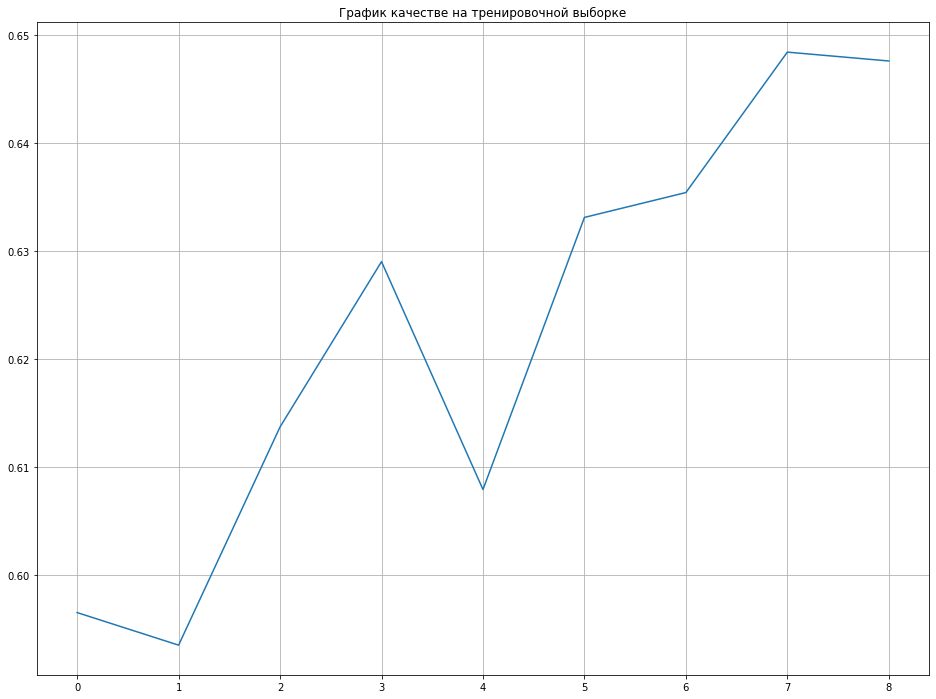

In [125]:
plt.figure(figsize=(16,12))
plt.plot(list_score_train)
plt.title('График качестве на тренировочной выборке')
plt.grid()
plt.show();

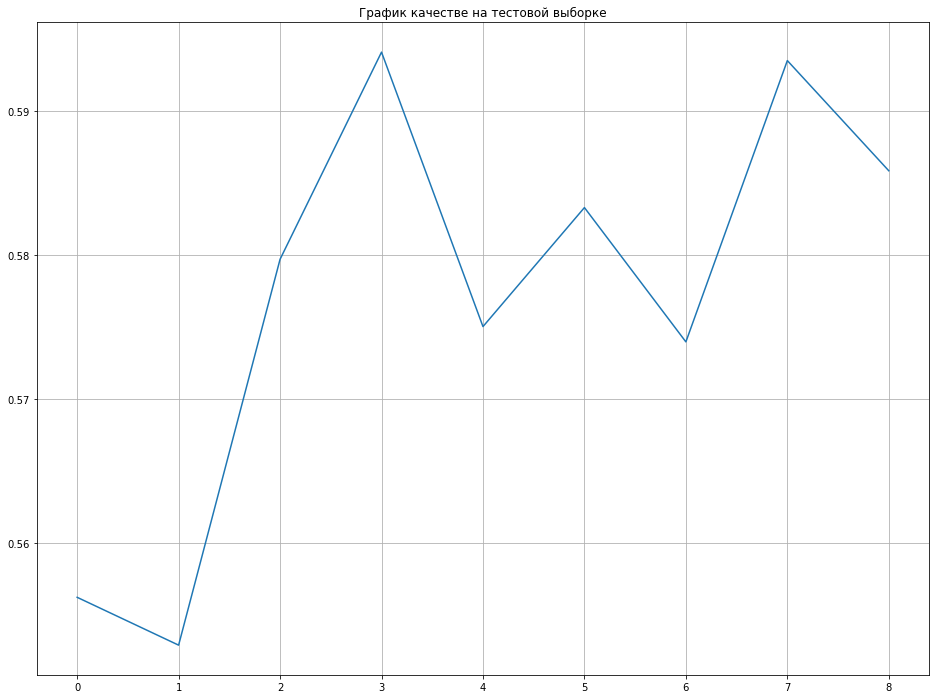

In [126]:
plt.figure(figsize=(16,12))
plt.plot(list_score_test)
plt.title('График качестве на тестовой выборке')
plt.grid()
plt.show();

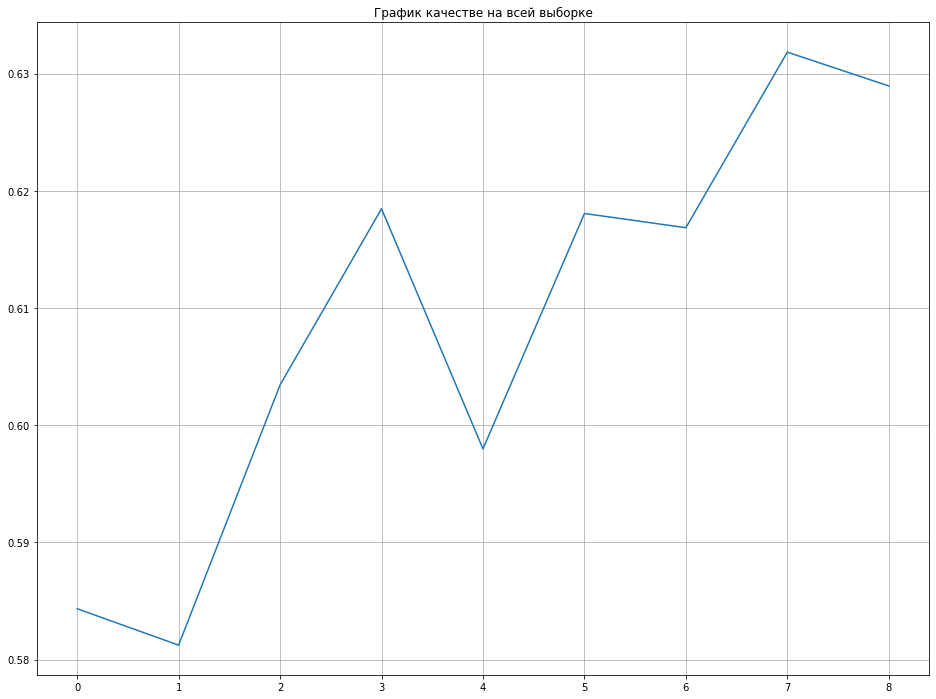

In [127]:
plt.figure(figsize=(16,12))
plt.plot(list_score)
plt.title('График качестве на всей выборке')
plt.grid()
plt.show();

# Общий вывод:

При работе с пропусками и введении новых признаков, концептуально можно добиться тенденции на улучшения модели.

На текуищем датасете была выбрана стратегия исключения высоко коррелированных признаков и заполнение признаков с пропусками мединным значением, это помогло улучшить качество, но не значительно.

Для вывода модели в продакшн, нужно проделать большую работу с данными и эксперементировать с моделями, возможно более сложными моделями.